# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

# 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치 계산에 필요한 numpy, 시각화에 사용할 seaborn을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 &matplotlib inline 설정이 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 한글 폰트 설정

In [2]:
# 한글폰트를 설정하지 않으면,그래프 상에서 글자가 깨지는 현상 발생
# 한글이 출력되도록 폰트를 설정한다

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus = False)

In [3]:
# 레티나 설정으로 글씨와 그래프가 선명하게 보이도록 한다
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

* 데이터 로드시 컬럼명과 인코딩에 주의하기

In [4]:
# 다운로드 받은 파일을 판다스의 read_csv를 통해 읽어옵니다.
# shape으로 행과 열의 수를 출력합니다.

df = pd.read_csv("data/NHIS_OPEN_GJ_2017.csv", encoding = "cp949")
df.shape

(1000000, 34)

## 데이터 미리보기

In [5]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.

df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0   1.0         1      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0   0.0         1      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0   0.0         0      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0   0.0         1      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0   0.0         1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  2.0  20181126  
2           NaN  NaN  20181126  
3           NaN  0.0  20181126  
4           NaN  0.0  20181126  

[5 rows x 34 columns]

In [6]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   27.0   1.0   0.0         0      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0   0.0         0      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0   1.0         0      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0   0.0         0      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
999995      NaN           NaN NaN  20181126  
999996      NaN           NaN NaN  20181126  
999997      NaN           NaN NaN  20181126  
999998      NaN           NaN NaN  20181126  
999999      NaN           NaN NaN  20181126  

[5 rows x 34 columns]

In [7]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
961060  2017   961061     2           13    41        155         55  73.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
961060    0.7    0.4  ...   32.0   1.0   0.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
961060      NaN           NaN NaN  20181126  

[1 rows x 34 columns]

# 기본 정보 보기

In [8]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [9]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [10]:
# dtypes 를 통해 데이터 형식만 출력합니다
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 결측치 보기

In [11]:
# isnull을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어줍니다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [12]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계할 수 있습니다
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

<AxesSubplot:>

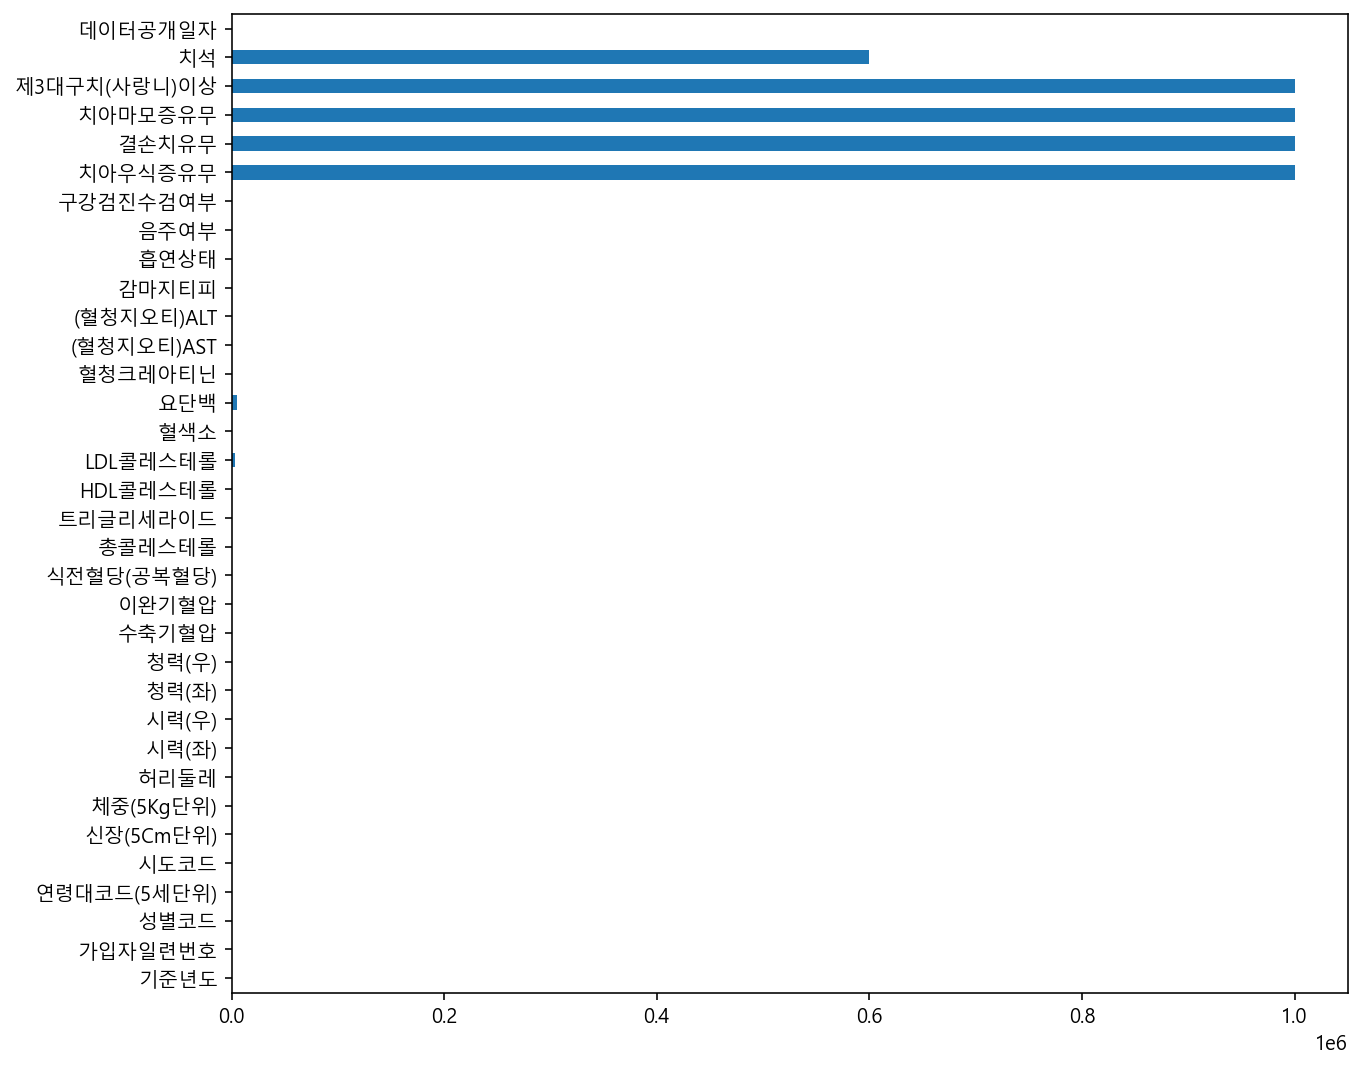

In [13]:
# 판다스에 내장 된 plot을 통해 시각화를 합니다.
df.isnull().sum().plot.barh(figsize = (10, 9))

# 일부 데이터 요약하기

In [14]:
# 여러 컬럼을 가져옵니다
#"(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기 합니다.
# 여러개의 데이터를 가져오려면 리스트 형태를 갖추어야됨
df[["(혈청지오티)ALT","(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [15]:
# "(혈청지오티)ATL". "(혈청지오티)AST" 를 요약합니다.
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

# value_counts 값으로 집계하기

In [16]:
# value_counts를 통해 성별코드로 그룹화 하고 갯수를 집계합니다
# 1 : 남성, 2 : 여성

df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [17]:
# value_counts를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다. 
# 1.0 : 금연, 3.0 : 흡연중, 2.0 : 금연

df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# groupby와 pivot_table 사용하기

## groupby
* series의 형태로 data 출력

In [18]:
# grooupby를 통해 데이터를 그룹화합니다
# 성별코드로 그룹화한 데이터를 세어봅니다

df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [19]:
# 성별코드와 음주여부를 그룹화 하고 갯수를 세어본다
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [20]:
# 성별코드와 음중여부로 그룹화를 하고 감마지피티의 평균을 구합니다

df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [21]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [22]:
#  agg을 사용하면 여러 수치를 함께 구할 수 있습니다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(
    ["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

## pivot_table
* dataframe의 형태로 data 출력
* groupby에 비해 속도는 느리지만, 직관적임

In [23]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다
df.pivot_table(index = "음주여부", values= "가입자일련번호", aggfunc = "count")

가입자일련번호
음주여부         
0.0    500439
1.0    499025

In [24]:
# 음주여부에 따른 감마지티피의 평균을 구합니다
pd.pivot_table(df, index = "음주여부", values= "감마지티피")

감마지티피
음주여부           
0.0   26.819650
1.0   47.588675

In [25]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정해 줄 수도 있습니다
pd.pivot_table(df, index = "음주여부", values= "감마지티피", aggfunc = 'mean')

감마지티피
음주여부           
0.0   26.819650
1.0   47.588675

In [26]:
# aggfunc에 여러 값을 한번에 지정할 수도 있습니다
pd.pivot_table(df, index = "음주여부", values= "감마지티피", 
               aggfunc = ["mean", "median"])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.819650   19.0
1.0   47.588675   30.0

In [27]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있습니다.
pd.pivot_table(df, index = "음주여부", values= "감마지티피", 
               aggfunc = "describe")

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
0.0   14.0  19.0  29.0  500417.0  999.0  26.819650  1.0  30.639714
1.0   18.0  30.0  52.0  499005.0  999.0  47.588675  1.0  63.056912

In [28]:
# 성별코드 , 음주여부에 따른 감마지티피 값의 평균을 구합니다.

pd.pivot_table(df, index = ["성별코드","음주여부"], values= "감마지티피", 
               aggfunc = "describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     1.0   24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    0.0   13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     1.0   13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 전체 데이터 시각화 하기
* 100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화 하는 것을 권장합니다.
* 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.

## 히스토그램
* 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어진 것을 확인할 수 있었다.
* 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화하여 도수분포표를 만들고 그 결과를 시각화합니다.
* 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해 히스토그램을 그립니다

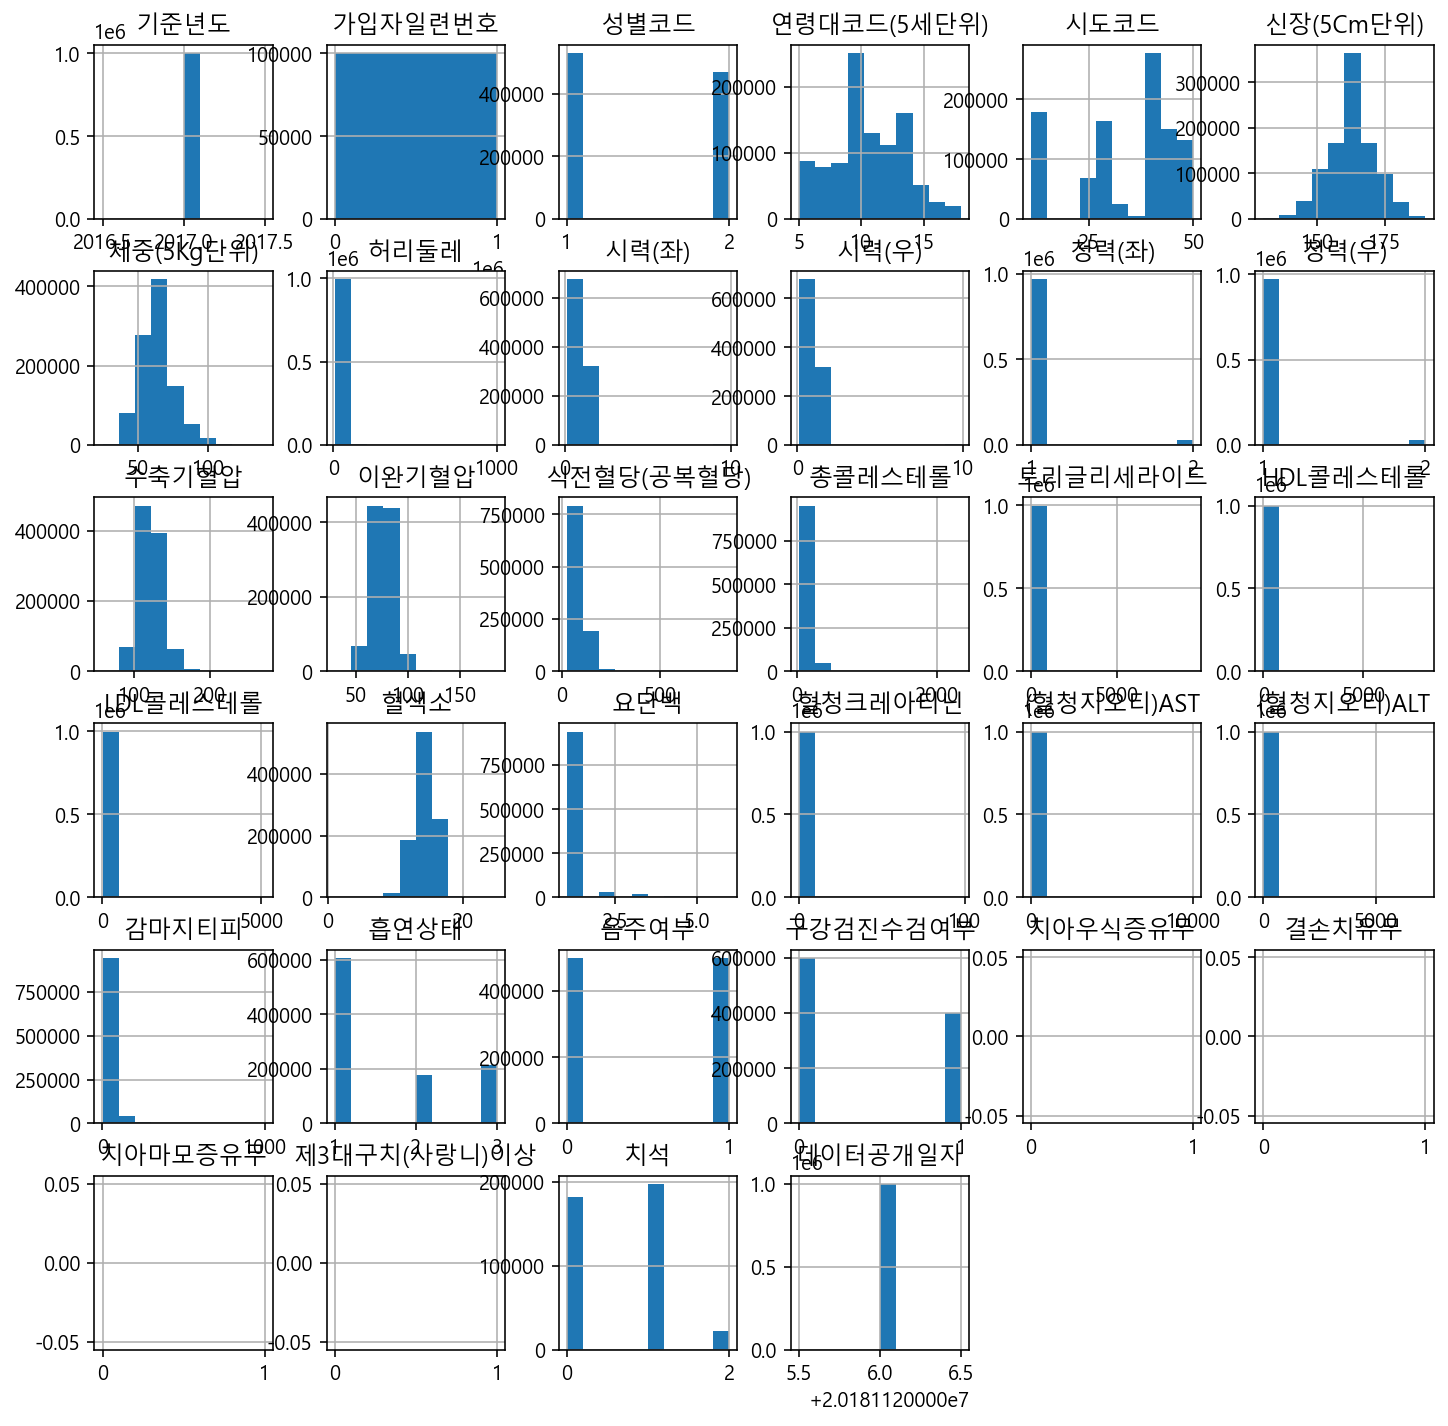

In [29]:
# 전체 데이터에 대한 히스토그램을 출력합니다
# 변수에 넣으면 출력값 없이 바로 시각화 출력가능

h = df.hist(figsize = (12, 12))

## 슬라이싱을 사용해 히스토그램 그리기
* 슬라이싱 기능을 사용해 데이터를 나누어 그립니다
* 슬라이싱 사용시 iloc을 활용하면 인덱스의 순서대로 슬레이싱이 가능합니다
* iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할때는 [:,:]를 사용합니다
* 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)을 지정할 수 있습니다.

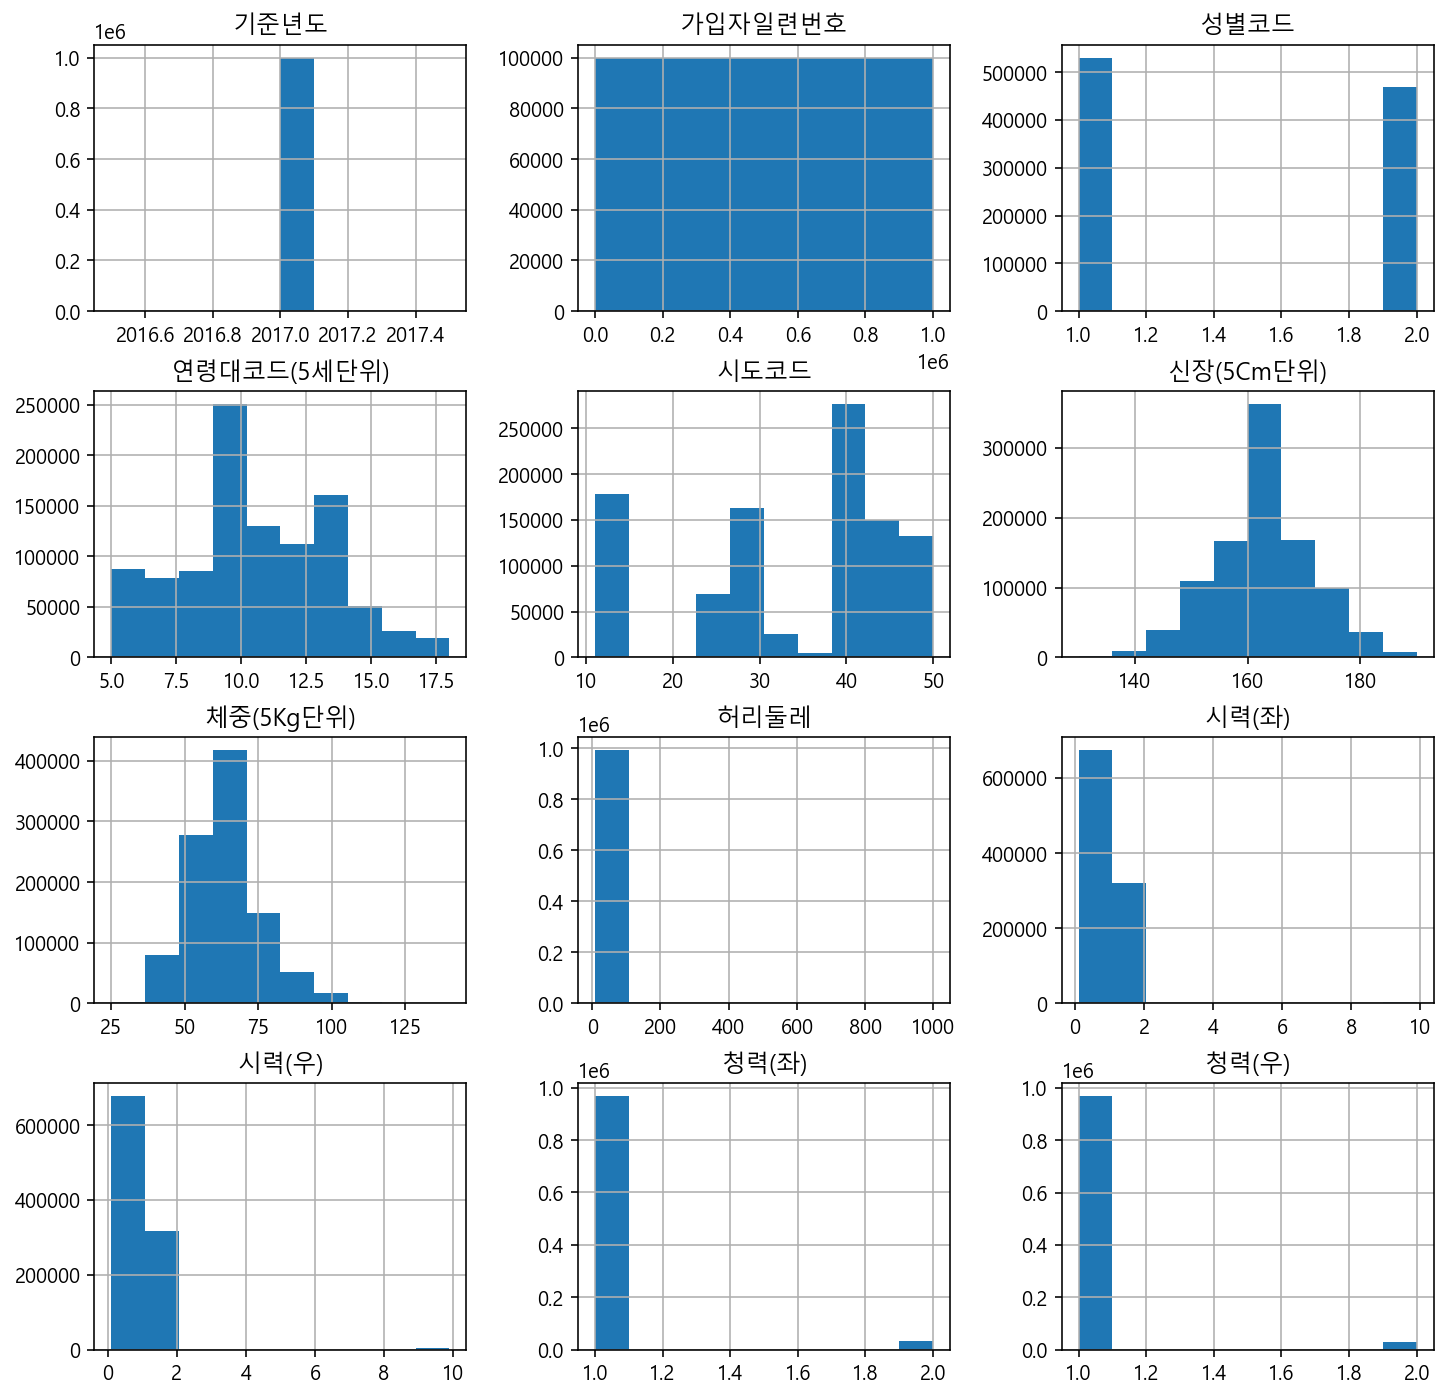

In [30]:
# 슬라이싱을 사용해 앞에서 12개 커럼에 대한 데이터로 히스토그램을 그립니다
# [행, 열]

h = df.iloc[:,:12].hist(figsize =(12, 12))

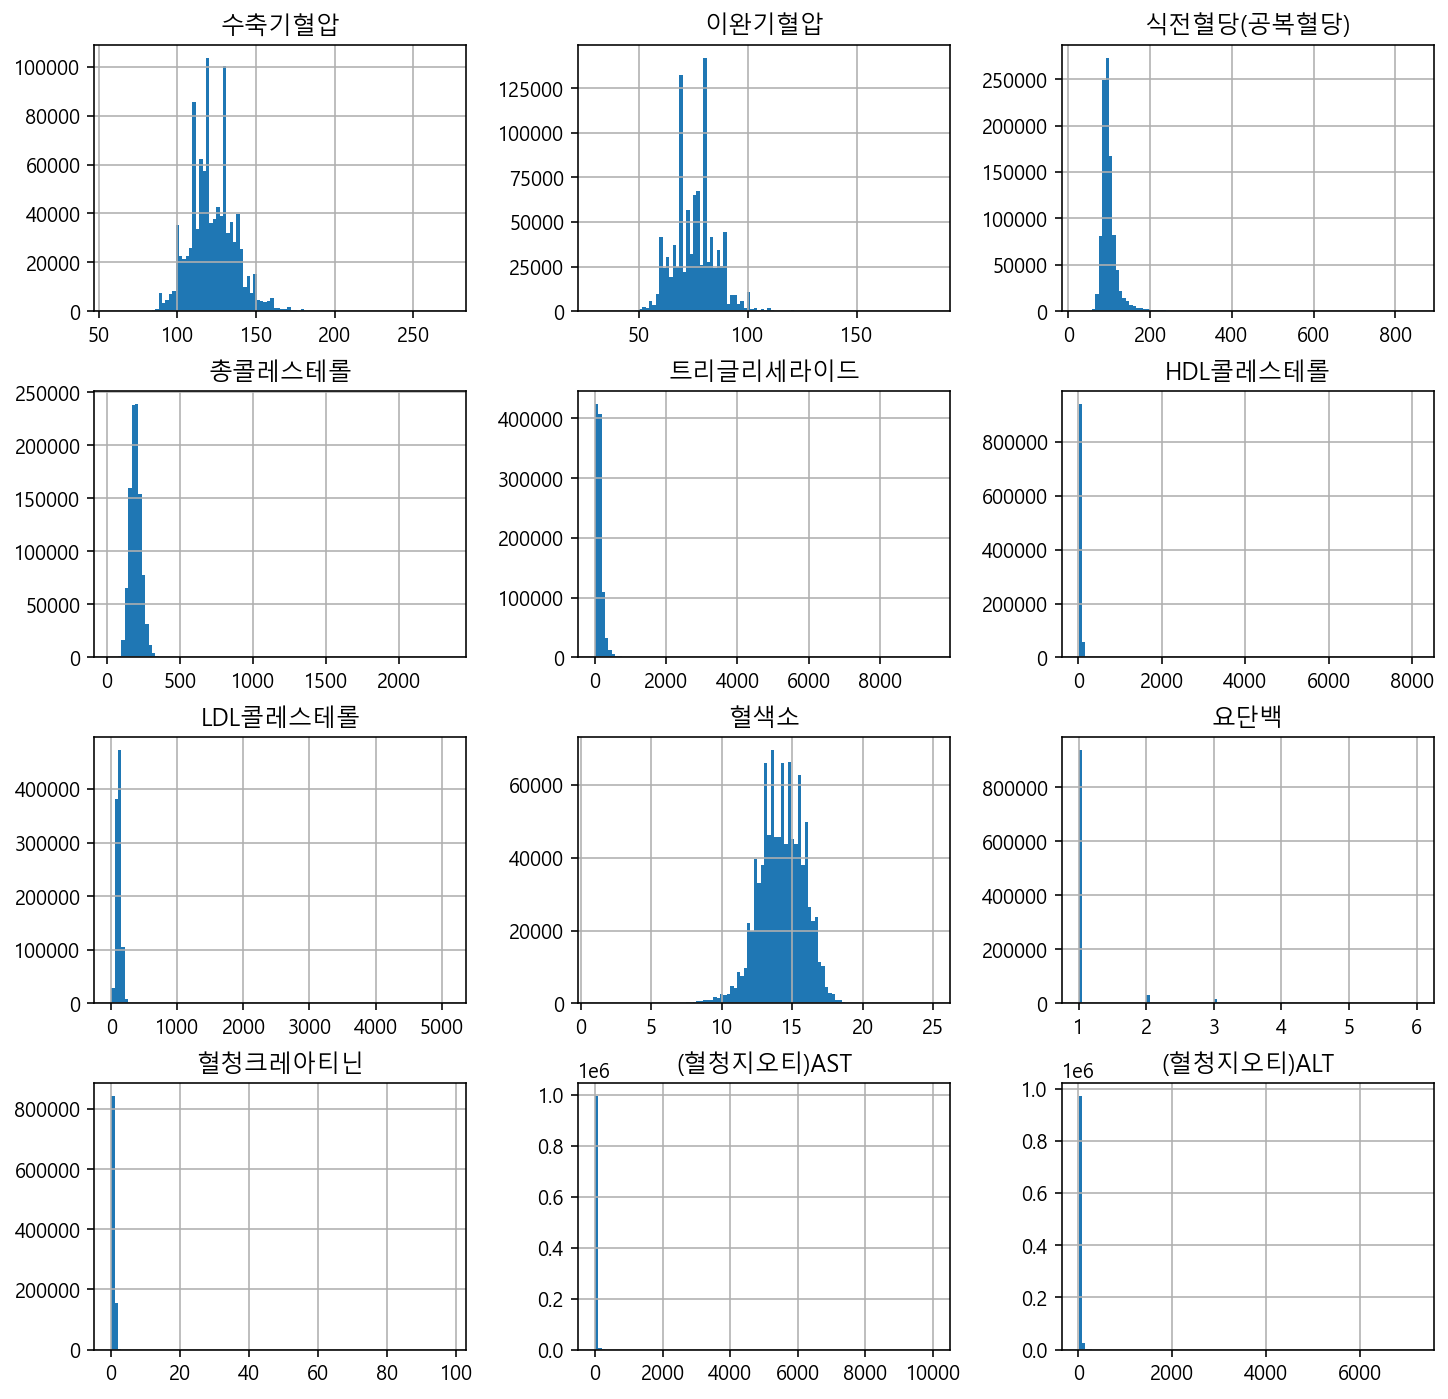

In [31]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그립니다

h = df.iloc[:,12:24].hist(figsize =(12, 12), bins = 100)

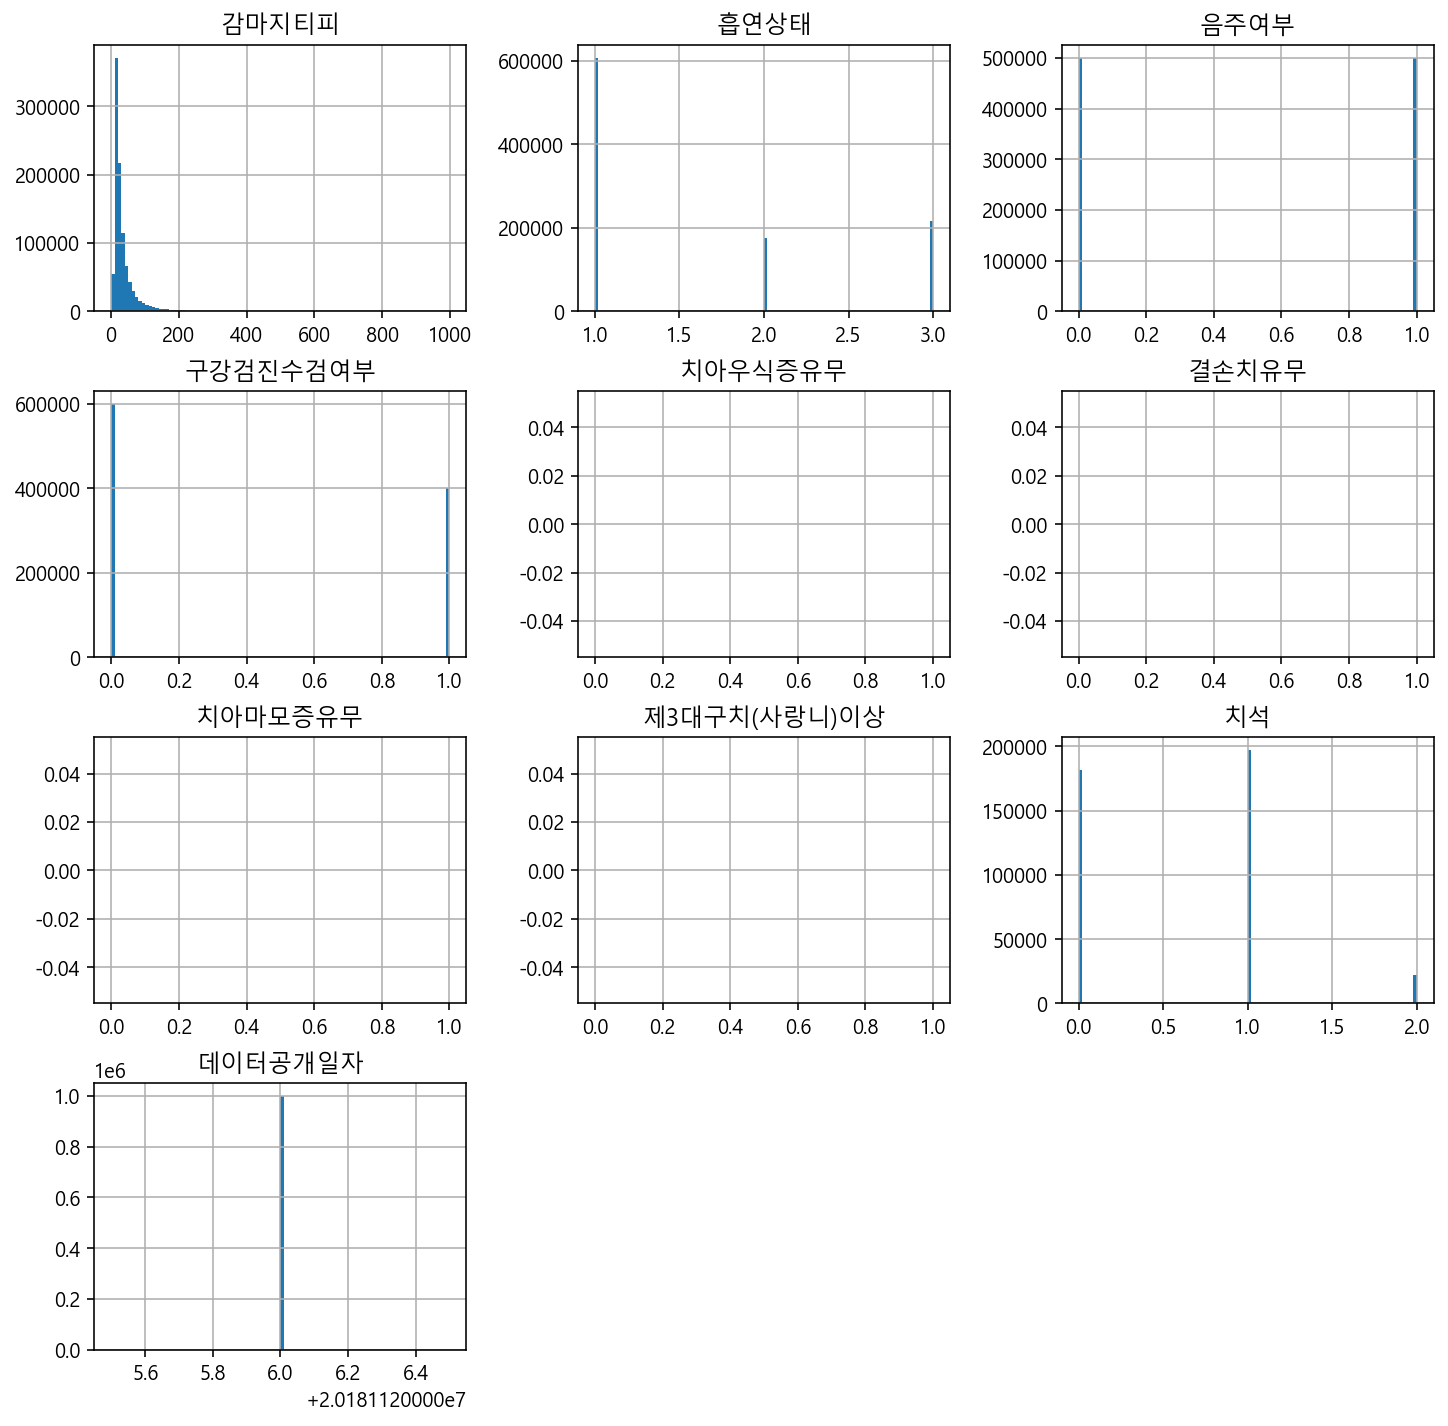

In [32]:
# 슬라이싱을 사용해 앞에서 24번재부터 마지막까지(24: ) 컬럼에 대한 데이터로 히스토그램을 그립니다.

h = df.iloc[:,24:].hist(figsize =(12, 12), bins = 100)

# 샘플데이터 추출하기
* seaborn의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래 걸립니다.
* 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해 사용합니다.

In [33]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출합니다.
# random_state를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 ranodom_state를 고정하기도 합니다.
# 여기서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관없이 값을 고정시키는 역할만 합니다. 

df_sample = df.sample(1000, random_state = 1)
df_sample

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
276826  2017   276827     1           12    41        160         55   77.0   
849425  2017   849426     1            9    31        170         75   89.9   
504499  2017   504500     1            8    42        170         75   86.3   
601054  2017   601055     1           14    31        170         70   84.0   
980221  2017   980222     1           17    41        160         60   86.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
890013  2017   890014     2            8    41        155         80   98.0   
875389  2017   875390     1           11    41        170         60   81.0   
358458  2017   358459     1            9    11        170         90  101.0   
808228  2017   808229     1           11    28        160         65   85.0   
317698  2017   317699     1            9    41        165         85  100.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
276826    0.9    0.9  ...   38.0   3.0   1.0         0      NaN    NaN   
849425    1.0    1.0  ...   28.0   3.0   1.0         1      NaN    NaN   
504499    1.5    1.5  ...  121.0   3.0   1.0         1      NaN    NaN   
601054    0.8    0.9  ...   31.0   3.0   0.0         0      NaN    NaN   
980221    0.7    0.5  ...   28.0   1.0   0.0         0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
890013    0.2    0.2  ...   39.0   1.0   0.0         1      NaN    NaN   
875389    1.0    0.9  ...   59.0   3.0   1.0         0      NaN    NaN   
358458    1.2    1.2  ...   41.0   2.0   1.0         0      NaN    NaN   
808228    0.6    0.9  ...   37.0   2.0   0.0         0      NaN    NaN   
317698    1.2    1.0  ...   40.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  1.0  20181126  
504499      NaN           NaN  1.0  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
890013      NaN           NaN  1.0  20181126  
875389      NaN           NaN  NaN  20181126  
358458      NaN           NaN  NaN  20181126  
808228      NaN           NaN  NaN  20181126  
317698      NaN           NaN  NaN  20181126  

[1000 rows x 34 columns]

# 데이터 시각화 도구 seaborn 사용하기
* seaborn은 matplotlib를 사용하기 쉽게 만들어졌으며. 간단하게 고급 통계 연산을 할 수 있습니다. 

# 범주형(카테고리) 데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
* value_counts로 구한 값을 시각화 한다고 보면 됩니다.

## countplot - 음주여부

<AxesSubplot:>

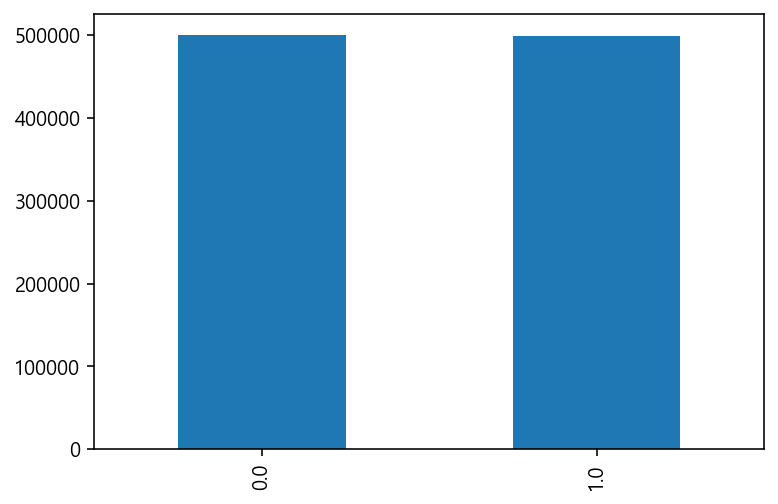

In [34]:
# 음주여부에 따른 countplot을 그립니다.
# 판다스 value_counts로 계산 

df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

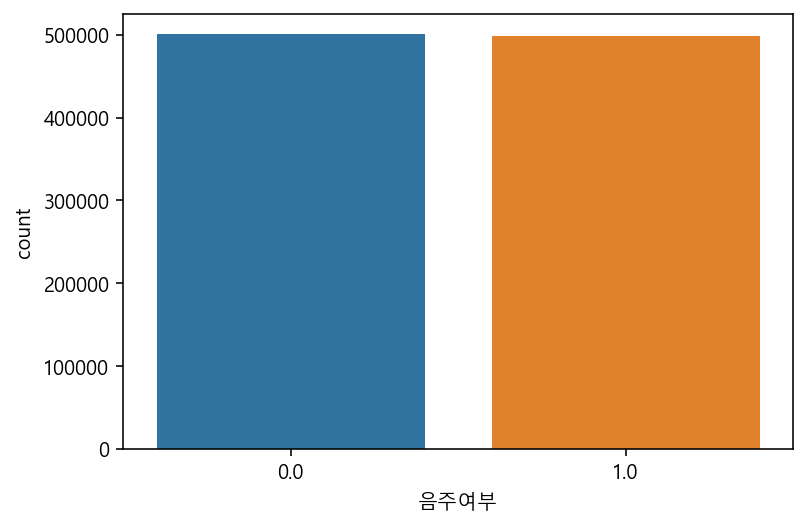

In [35]:
# seanorn의 countplot으로 계산

sns.countplot(x ="음주여부", data = df)

## hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

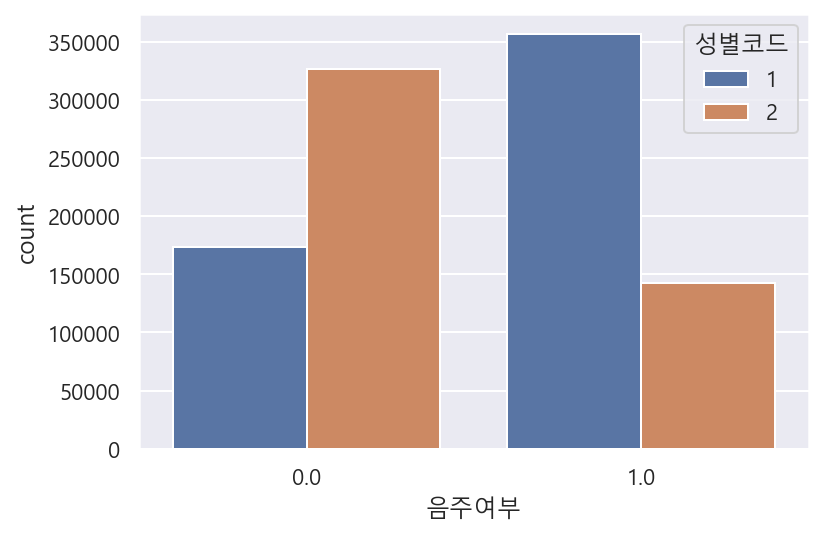

In [36]:
# 음주여부에 따른 countplot을 그리고 hue를 사용해 성별 코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 된다. 색상을 의미한다.
# 또,seaborn에서 제공하는 폰트 설정을 사용할 수 있다. 
# 다만, seaborn에서 기본 스타일이 적용되는 것을 확인하는 것이 좋다.

sns. set(font_scale = 1, font = "Malgun Gothic")
sns.countplot(data = df, x ="음주여부", hue = "성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

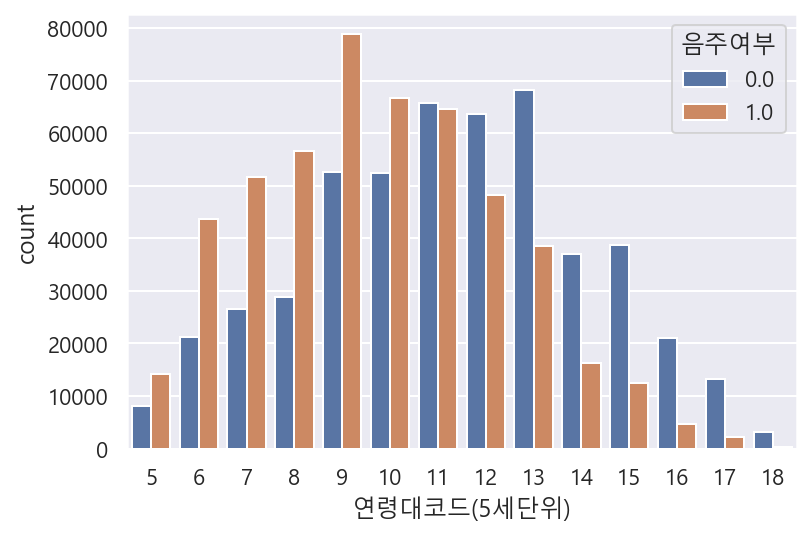

In [37]:
# countplot으로 연령대별 음주여부를 봅니다.
# hue를 사용해 다른 색상으로 표현합니다. 

sns.countplot(data = df, x ="연령대코드(5세단위)", hue = "음주여부")

## countplot - 키와 몸무게
* 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
* 하지만 이 데이터는 키는 5cm, 몸무게는 5kg 단위로 되어 있습니다.
* 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다. 

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

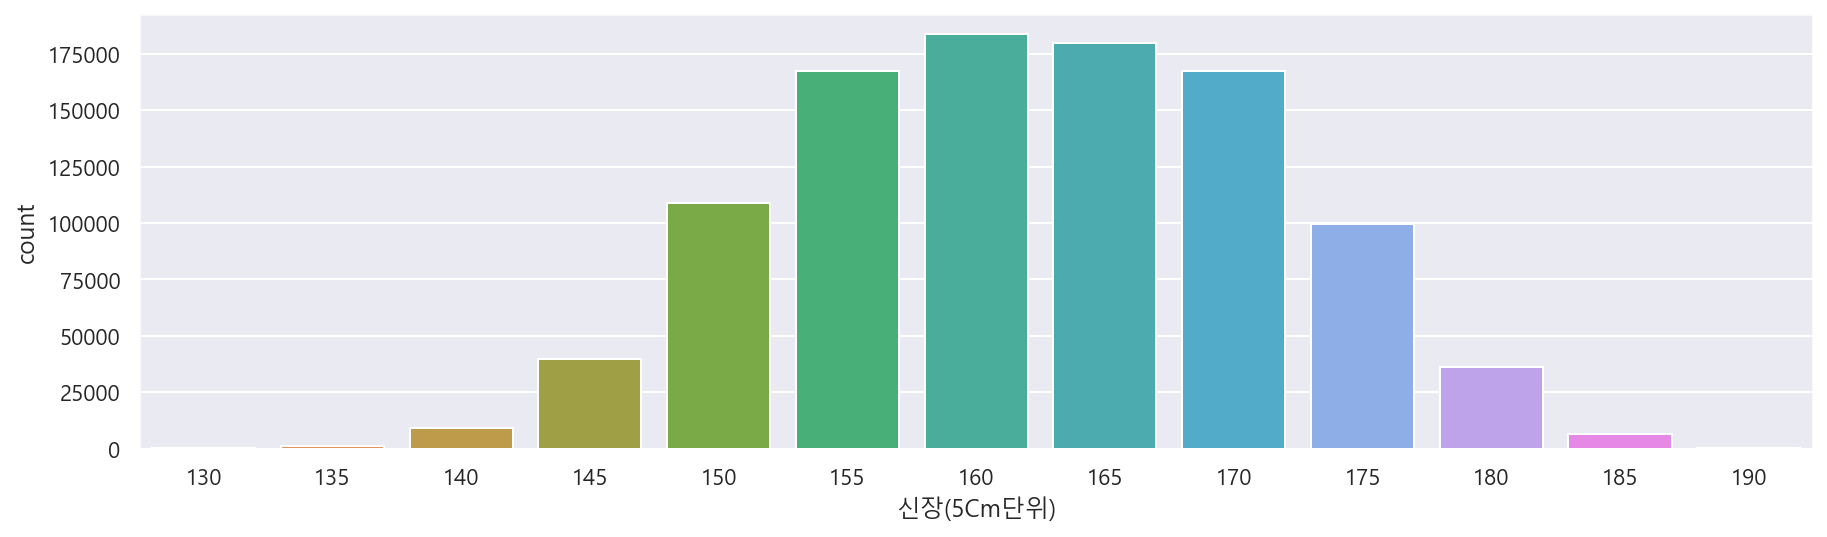

In [38]:
# countplot으로 키를 봅니다.
plt.figure(figsize  = (15,4))
sns.countplot(data =df, x = "신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

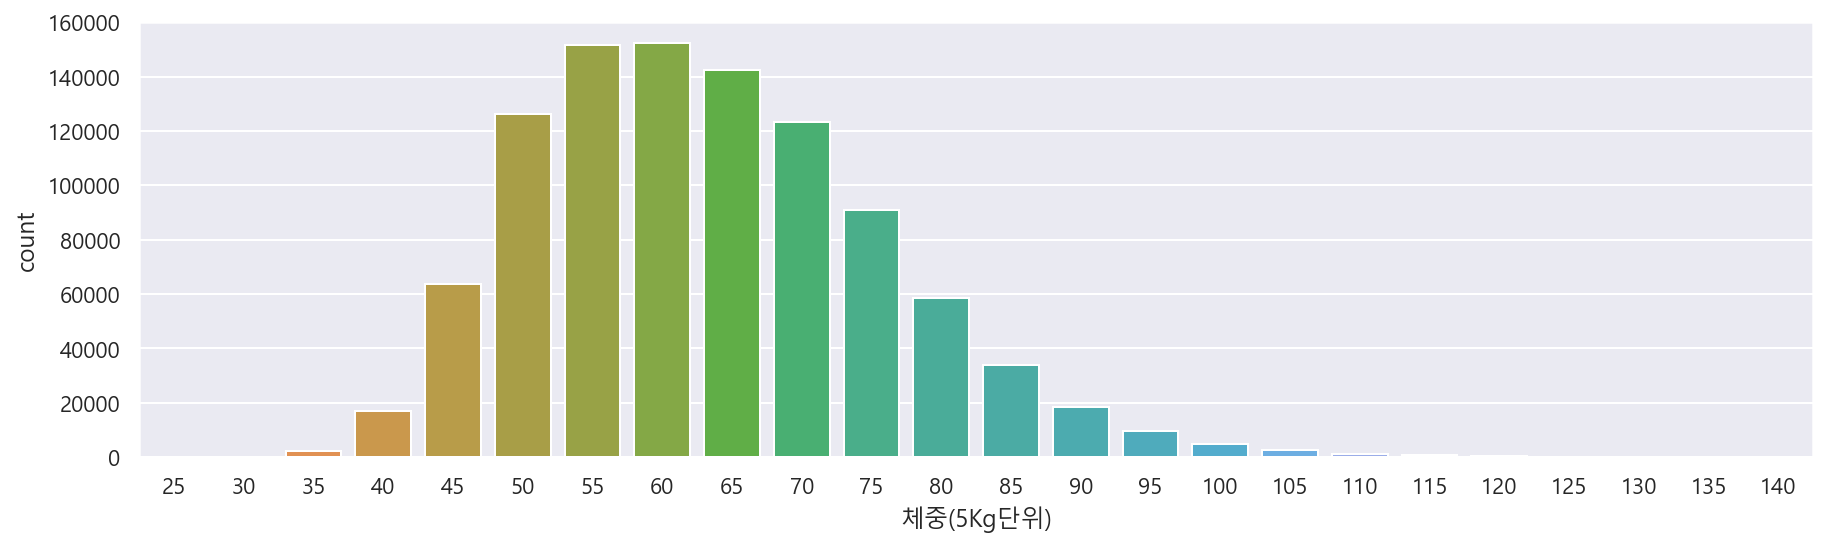

In [39]:
# countplot으로 몸무게를 봅니다 .

plt.figure(figsize  = (15,4))
sns.countplot(data = df, x = "체중(5Kg단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

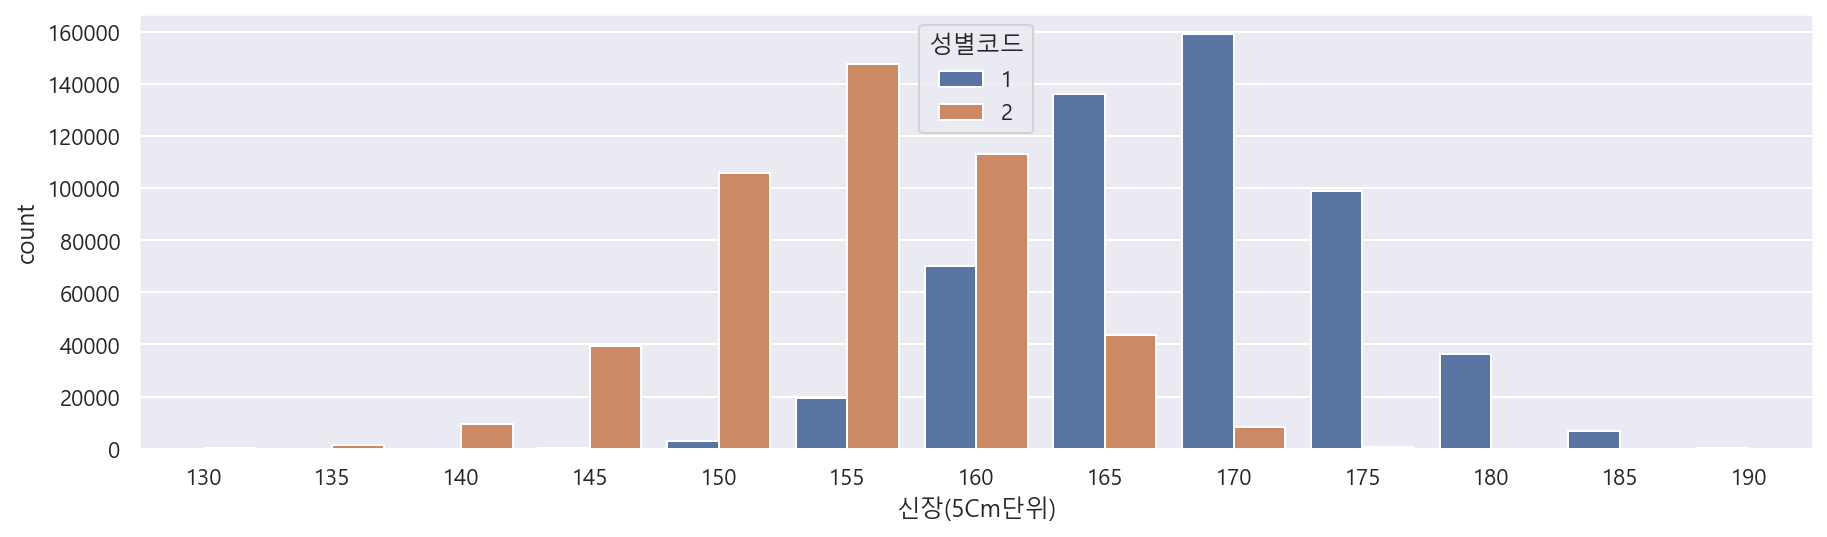

In [40]:
# countplot으로 키(5cm단위)를 봅니다.
# 성별에 따른 키의 차이를 봅니다.

plt.figure(figsize  = (15,4))
sns.countplot(data =df, x = "신장(5Cm단위)", hue = "성별코드")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

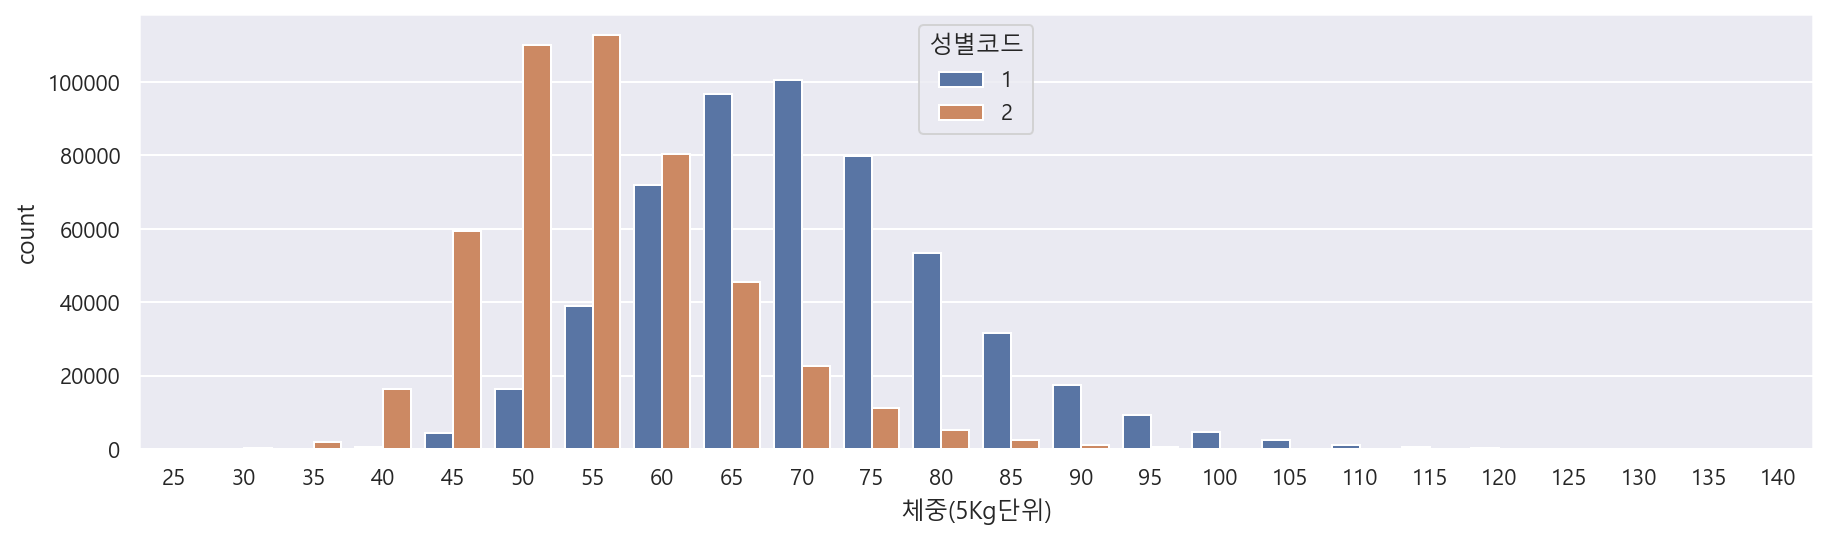

In [41]:
# 성별에 따른 몸무게 차이를 봅니다

plt.figure(figsize  = (15,4))
sns.countplot(data = df, x = "체중(5Kg단위)", hue = "성별코드")

## barplot - 수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

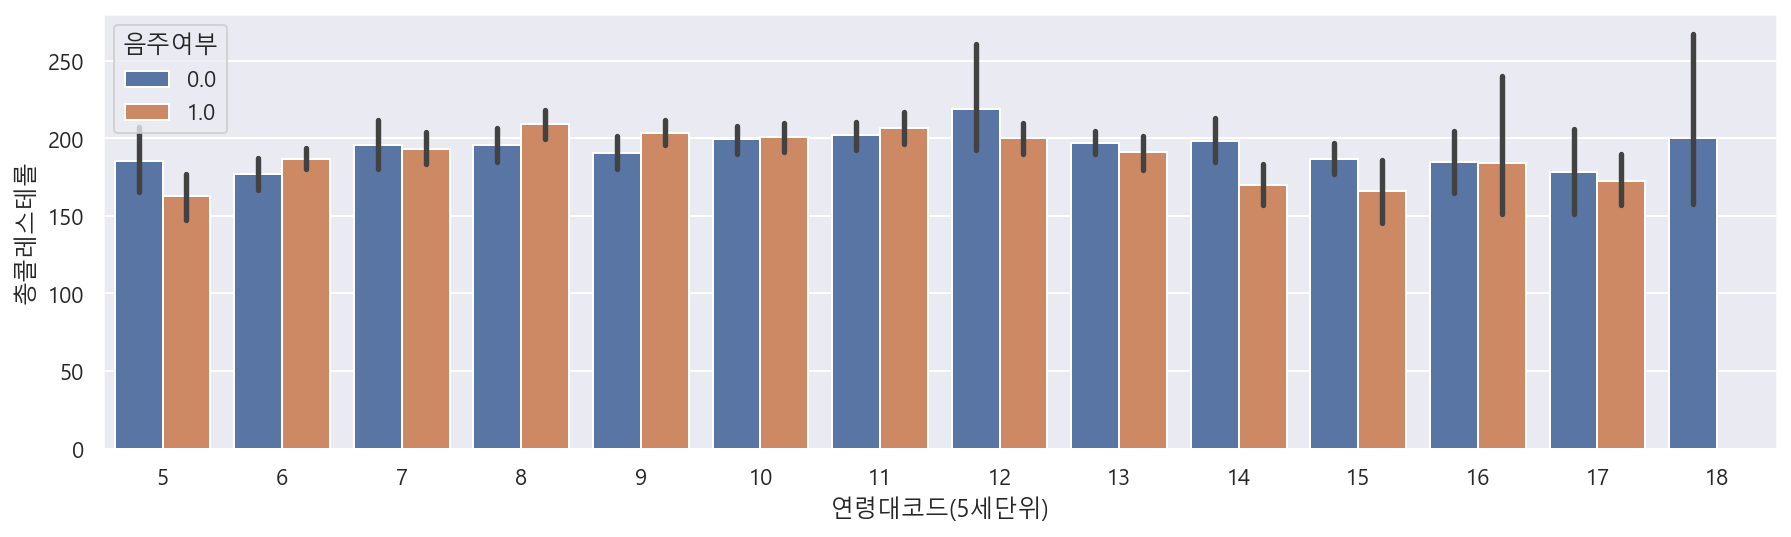

In [42]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue로 생삭을 다르게 표현할 수 있습니다. 음주여부를 함께봅니다.

plt.figure(figsize = (15,4))
sns.barplot(data = df_sample, x ="연령대코드(5세단위)", y = "총콜레스테롤", hue = "음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

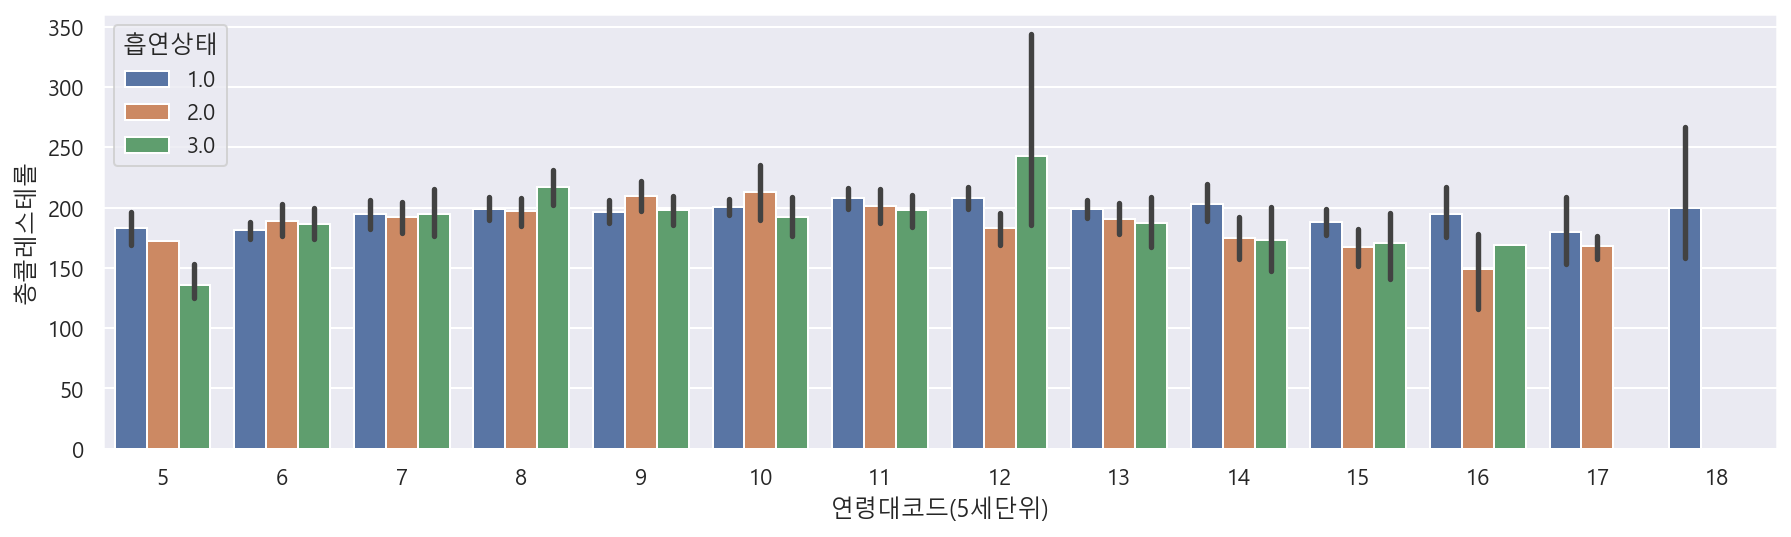

In [43]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그립니다

plt.figure(figsize = (15,4))
sns.barplot(data = df_sample, x ="연령대코드(5세단위)", y = "총콜레스테롤", hue = "흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

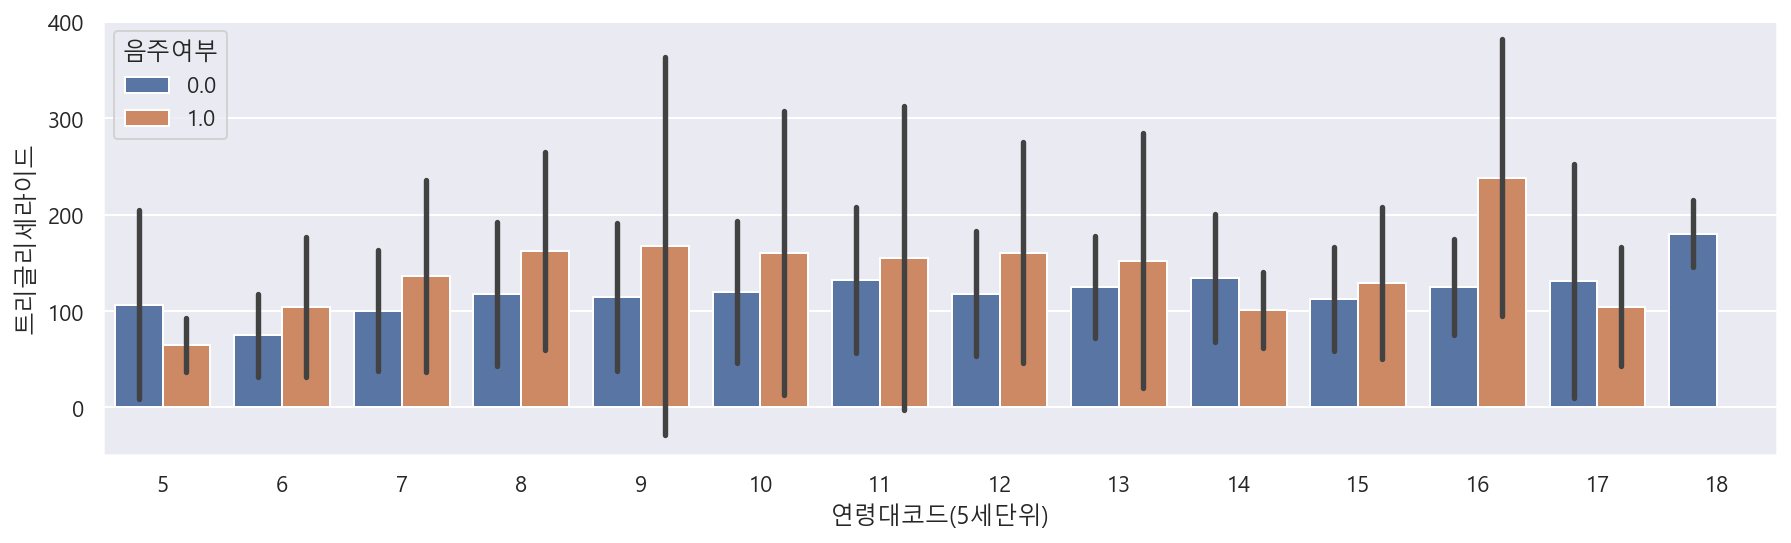

In [44]:
# 트리글리세라이드에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다..
# ci = "95", 기본값, 95%의 신뢰구간
# ci = "sd", 표준편차(sampel에 따라서 sd차이 있을 수 있음)
# ci = None, 그래프 빨리 그려짐, ci(신뢰구간)을 구하는데는 시간이 꽤 걸림

plt.figure(figsize = (15,4))
sns.barplot(data = df_sample, x ="연령대코드(5세단위)", y = "트리글리세라이드", hue = "음주여부", ci = "sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

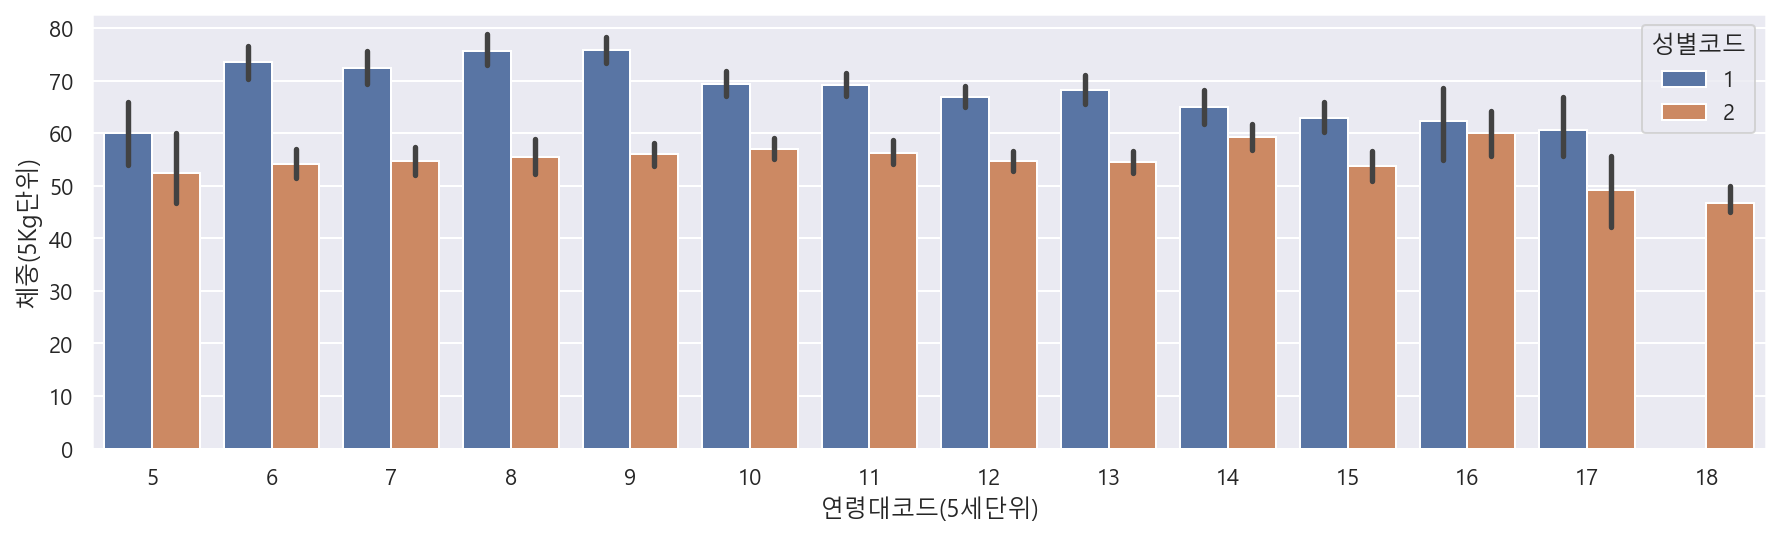

In [45]:
# 연령대코드와 체중(5Kg단위)를 성별에 따라봅니다. 

plt.figure(figsize = (15,4))
sns.barplot(data = df_sample, x ="연령대코드(5세단위)", y = "체중(5Kg단위)", hue = "성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

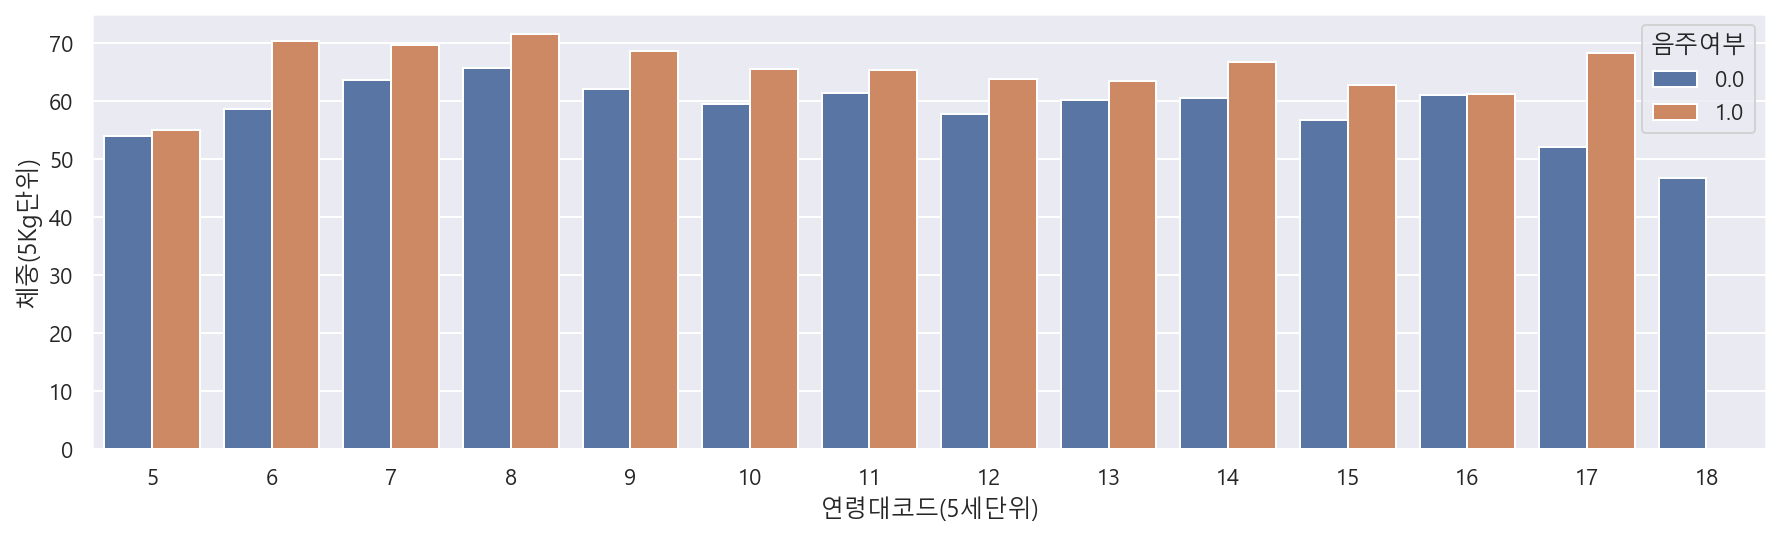

In [46]:
#연령대코드(5세단위)에 따른 체중(5Kg단위)를 음주여부에 따라 barplot으로 그립니다.

plt.figure(figsize = (15,4))
sns.barplot(data = df_sample, x ="연령대코드(5세단위)", y = "체중(5Kg단위)", hue = "음주여부", ci = None)

## lineplot and pointplot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

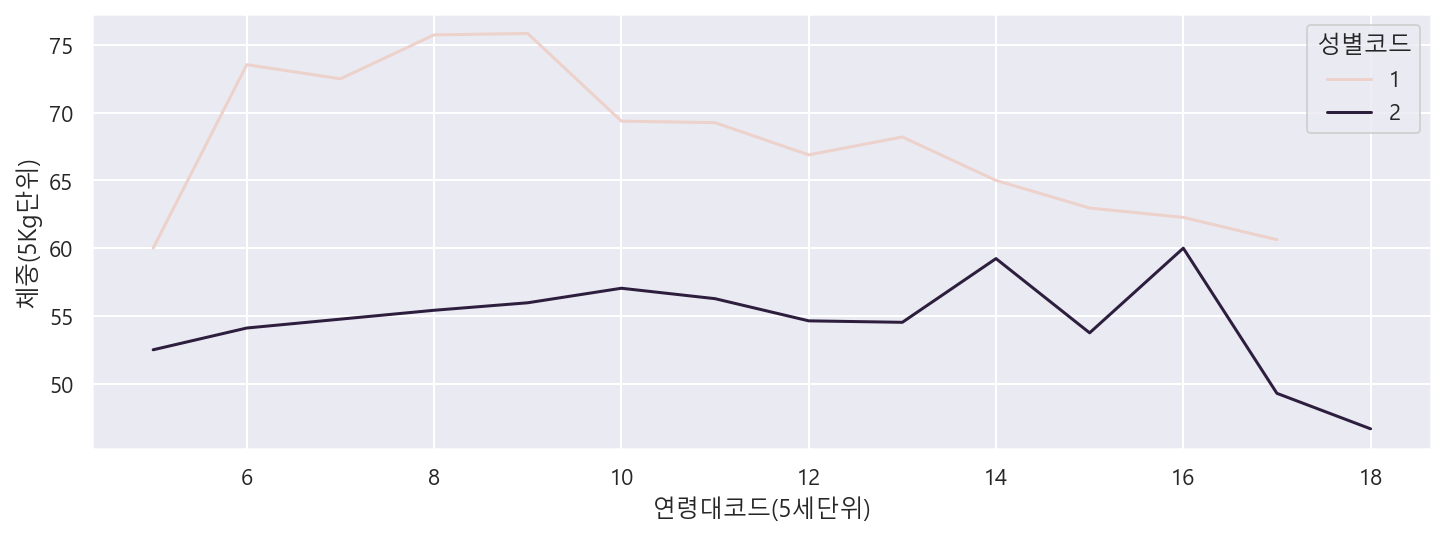

In [47]:
# 연령대코드(5세단위)에 따른 체중(5Kg단위)를 성별코드에 따라 lineplot으로 그립니다.

plt.figure(figsize = (12, 4))
sns.lineplot(data = df_sample, x = "연령대코드(5세단위)", y = "체중(5Kg단위)", hue = "성별코드", ci = None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

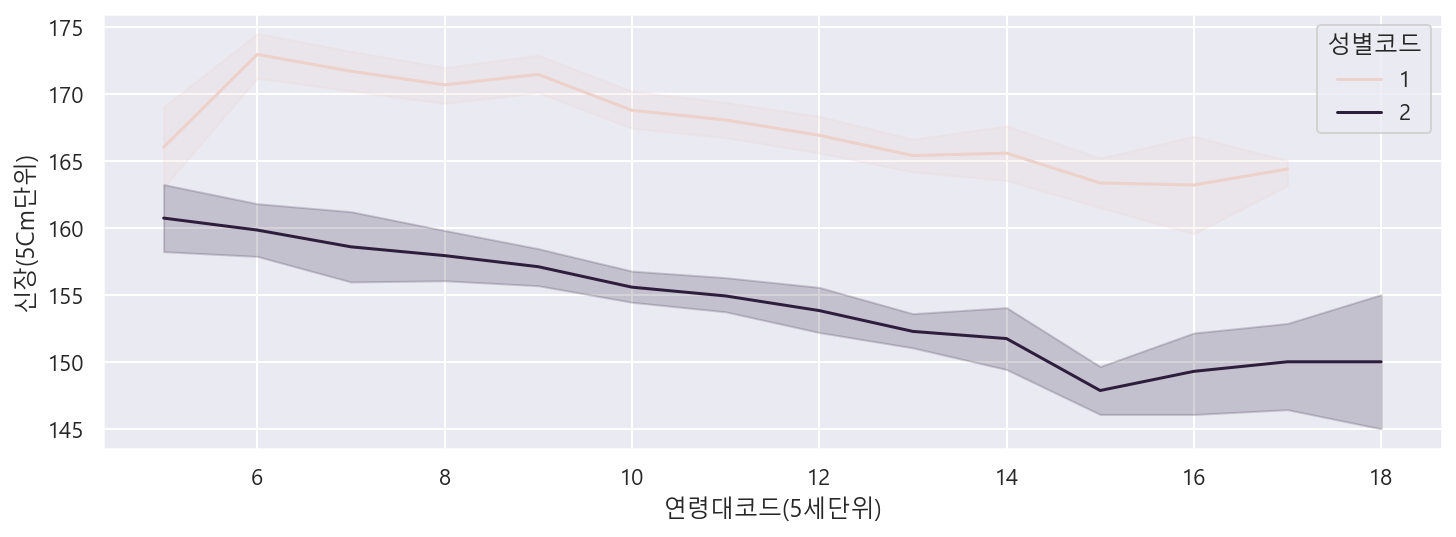

In [48]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위)을 성별코드에 따라 lineplot으로 그립니다. 

plt.figure(figsize = (12, 4))
sns.lineplot(data = df_sample, x = "연령대코드(5세단위)", y = "신장(5Cm단위)", hue = "성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

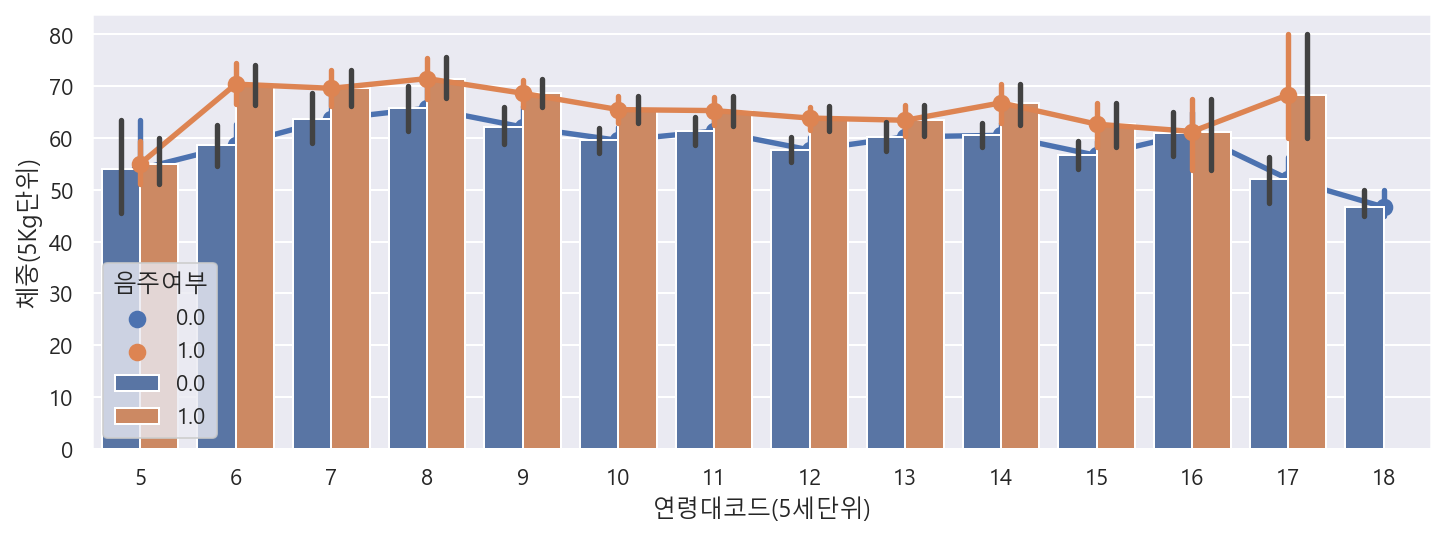

In [49]:
# 연령대코드(5세단위)에 따른 체중(5Kg단위)를 음주여부에 따라 pointplot과 batplot으로 그립니다.

plt.figure(figsize = (12, 4))
sns.pointplot(data = df_sample, x = "연령대코드(5세단위)", y = "체중(5Kg단위)", hue = "음주여부")
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "체중(5Kg단위)", hue = "음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

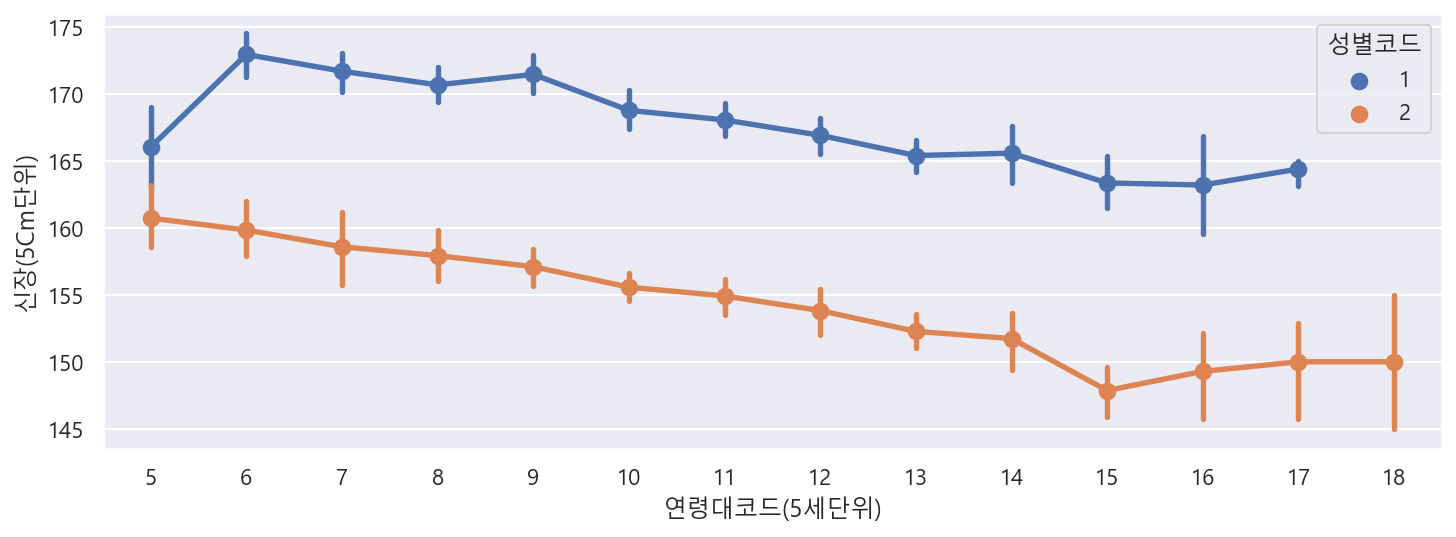

In [50]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위)을 성별코드에 따라 pointplot으로 그립니다.

plt.figure(figsize = (12, 4))
sns.pointplot(data = df_sample, x = "연령대코드(5세단위)", y = "신장(5Cm단위)", hue = "성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

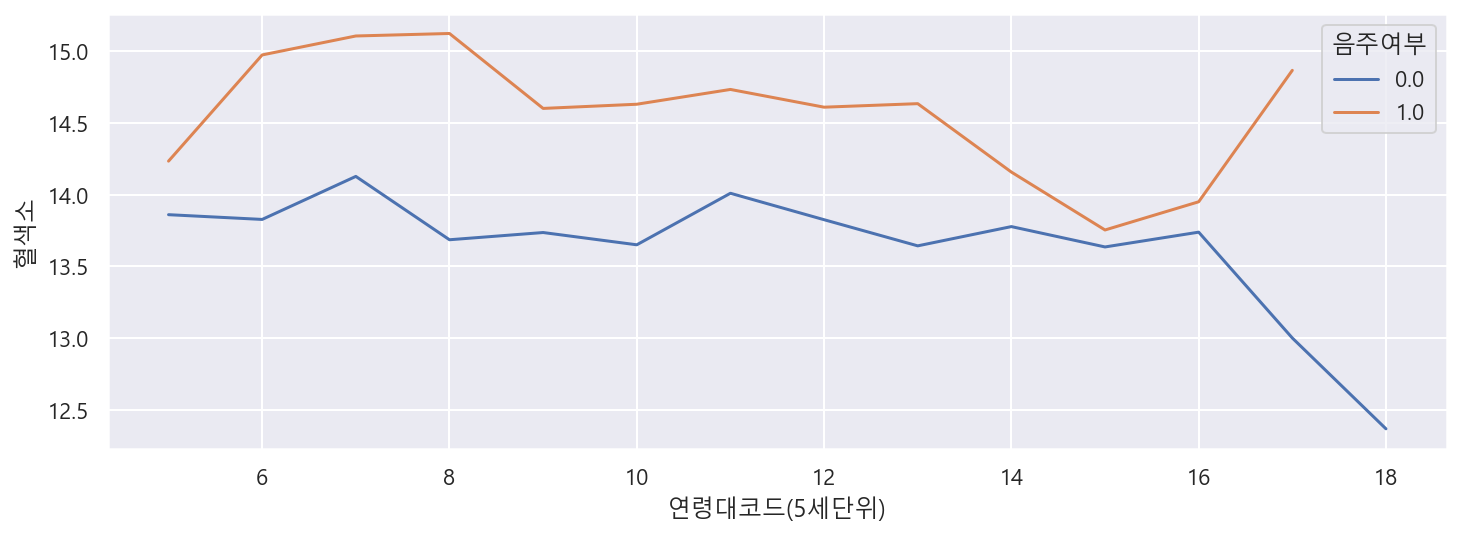

In [51]:
# 연령대코드(5세단위)에 따른 혈색소를 음주여부에 따라 lineplot으로 그립니다. 

plt.figure(figsize = (12, 4))
sns.lineplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", ci = None)

## boxplot
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다

1. 최솟깂
2. 제 1사분위수
3. 제 2사분위수(), 즉 중앙값
4. 제 3사분위수(0
5. 최댓값

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

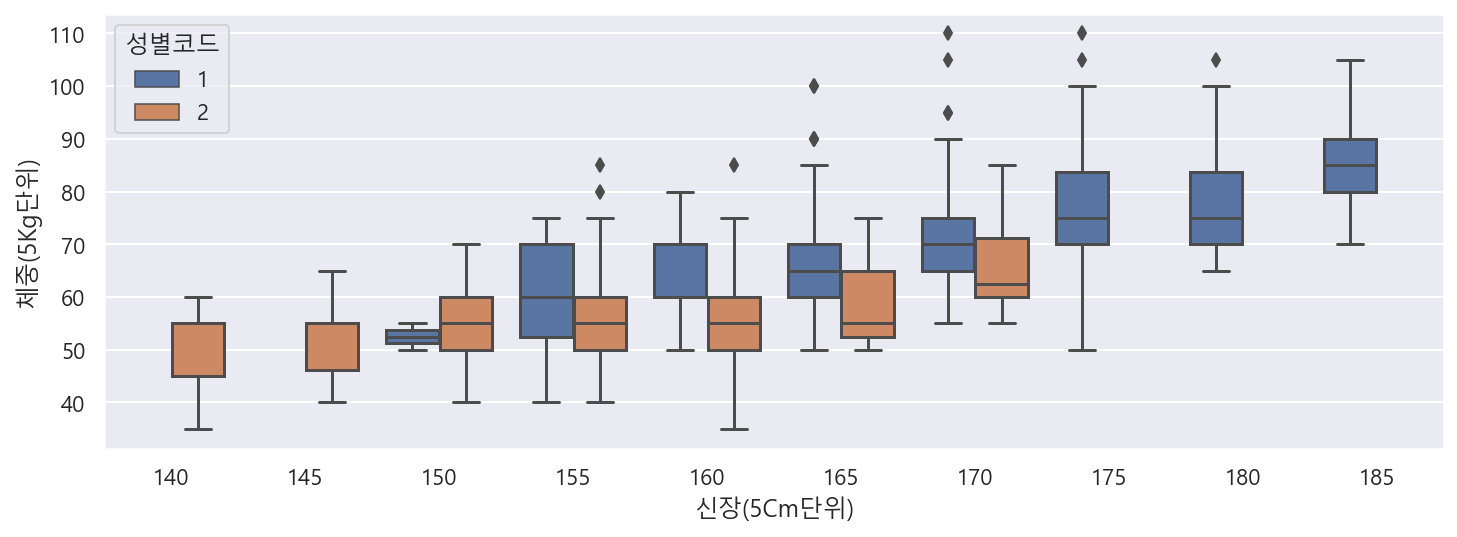

In [56]:
# boxplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)를 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.

plt.figure(figsize = (12, 4))
sns.boxplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "성별코드")

## violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

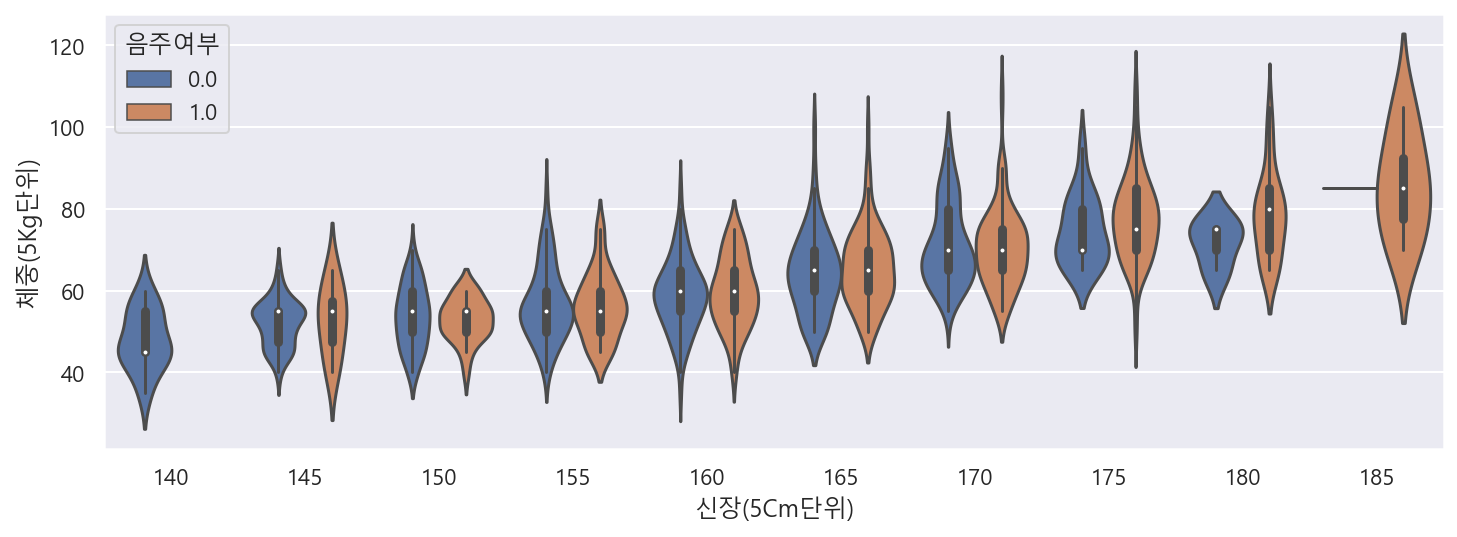

In [57]:
# violinplot 신장(5Cm단위)에 따른 체중(5kg단위)를 그리며. 음주여부에 따라 다른 색상으로 표현되게 합니다. 

plt.figure(figsize = (12, 4))
sns.violinplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

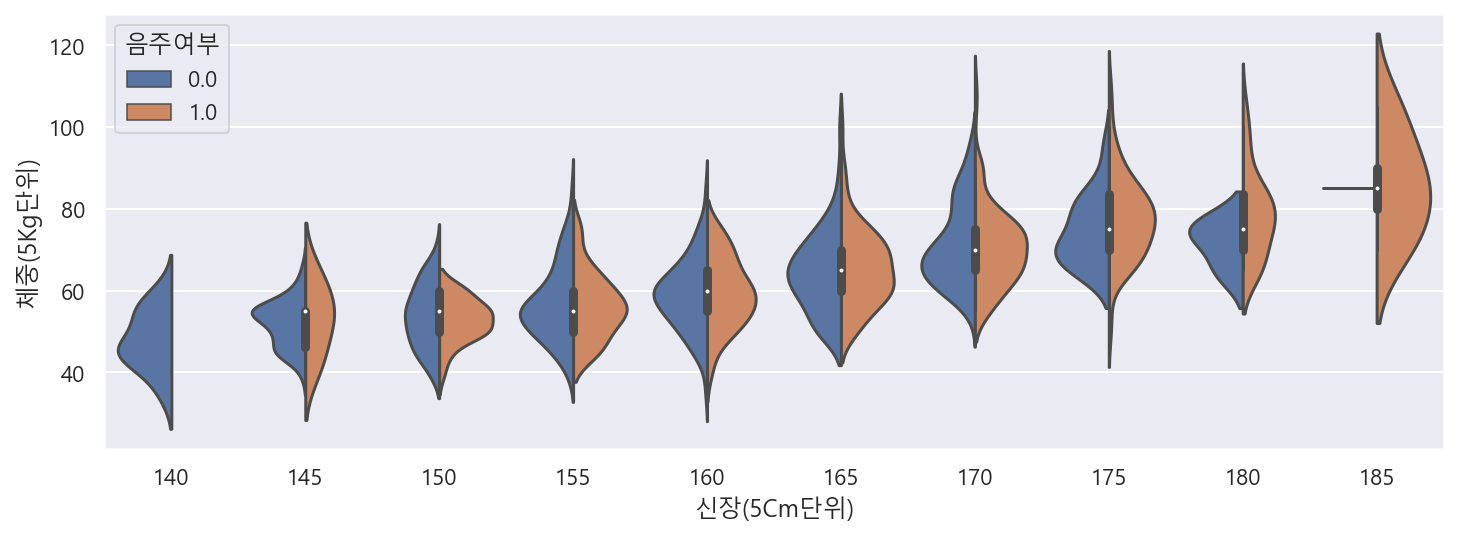

In [60]:
# violinplot의 split 기능을 사용해 봅니다.

plt.figure(figsize = (12, 4))
sns.violinplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "음주여부", split = True)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

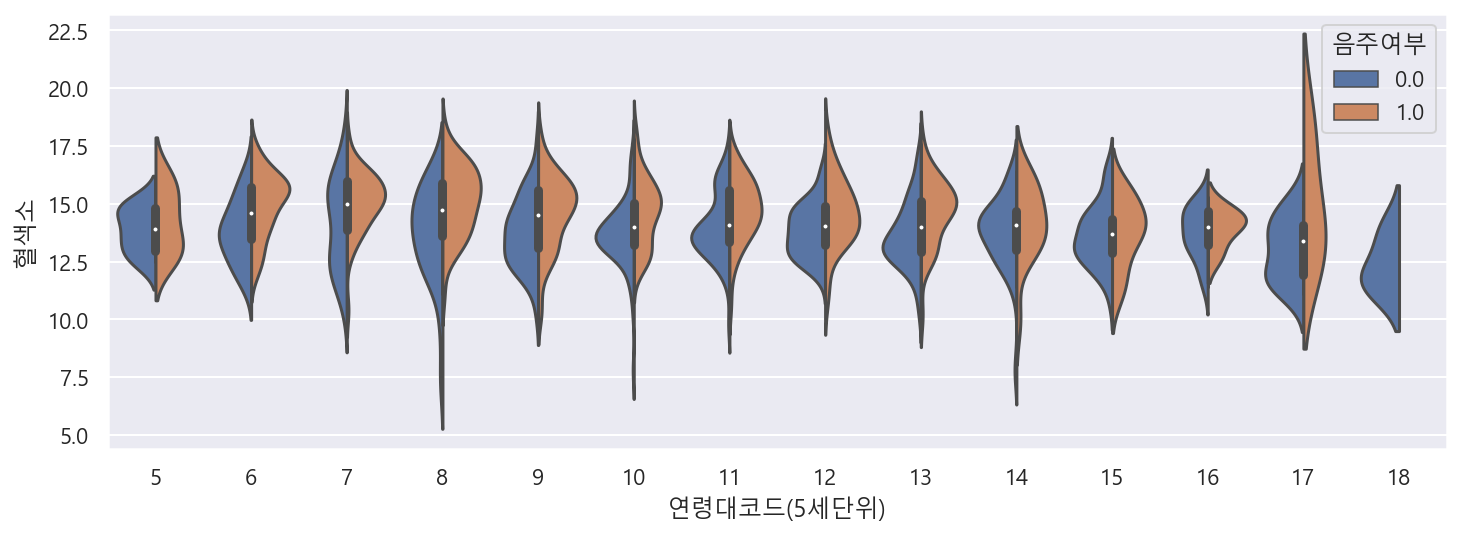

In [63]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다. 

plt.figure(figsize = (12, 4))
sns.violinplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", split = True)

## swarmplot
* 범주형 데이터를 산점도로 시각화하고자 할 때 사용합니다.


<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

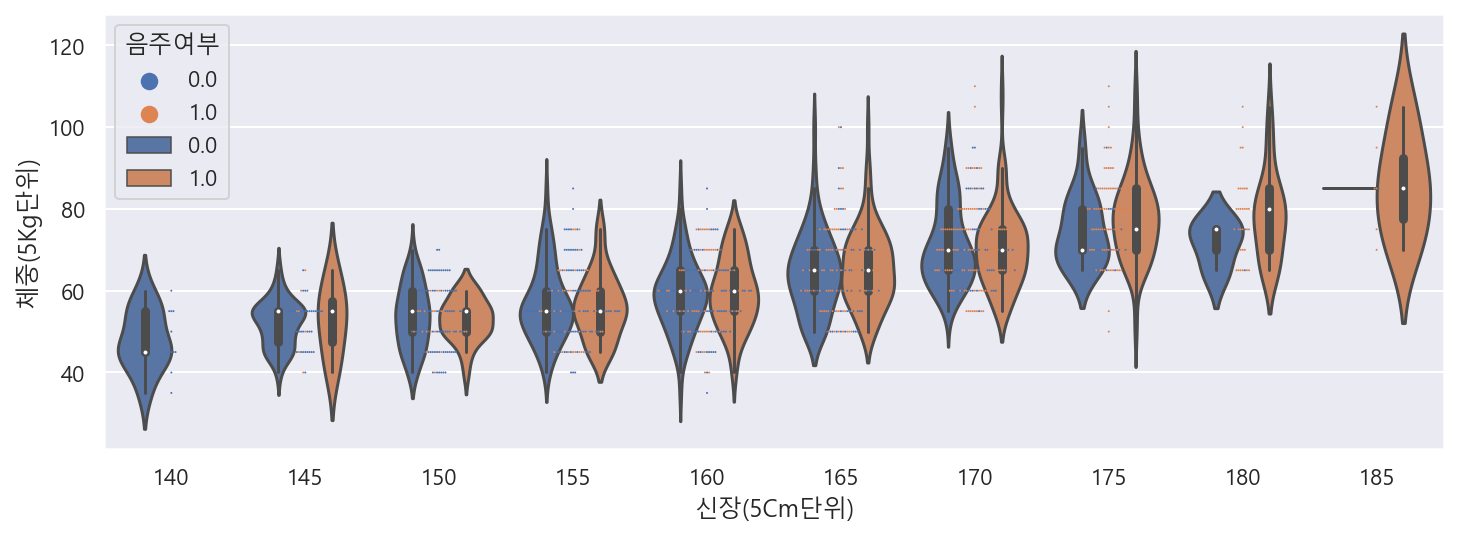

In [72]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)를 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.
# warning : stripplot vs swarmplot / swarmplot은 stripplot과 다르게 분산까지 표현, 중복 허용X
# swarmplot 사용시 size = 1로 제한하여 user warning 해결 >  점이 겹치거나 누락될 수 있음 > 마커 사이즈 줄이기

plt.figure(figsize = (12, 4))
sns.swarmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "음주여부", size = 1)
sns.violinplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

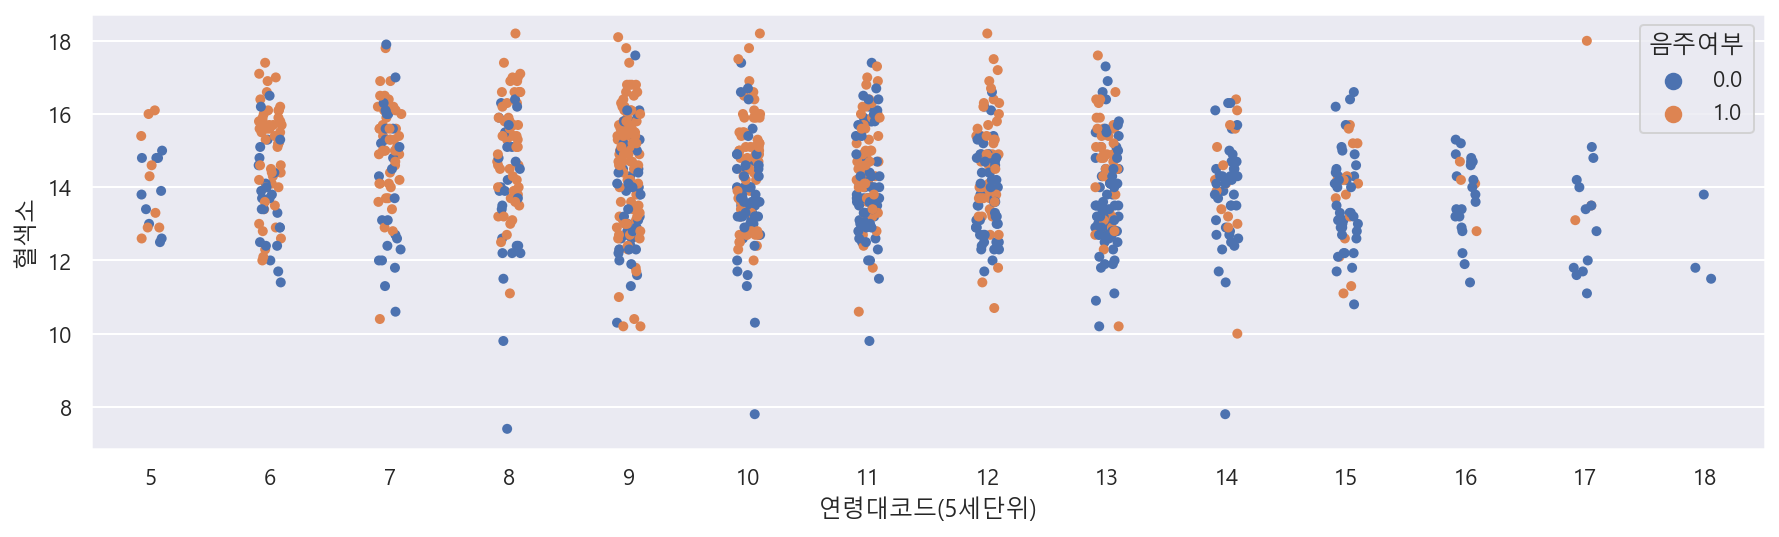

In [86]:
# swarmplot으로 연령대코드(5세단위)에 따른 혈색소를 그리며. 음주여부에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그립니다.

plt.figure(figsize = (15, 4))
sns.stripplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부")

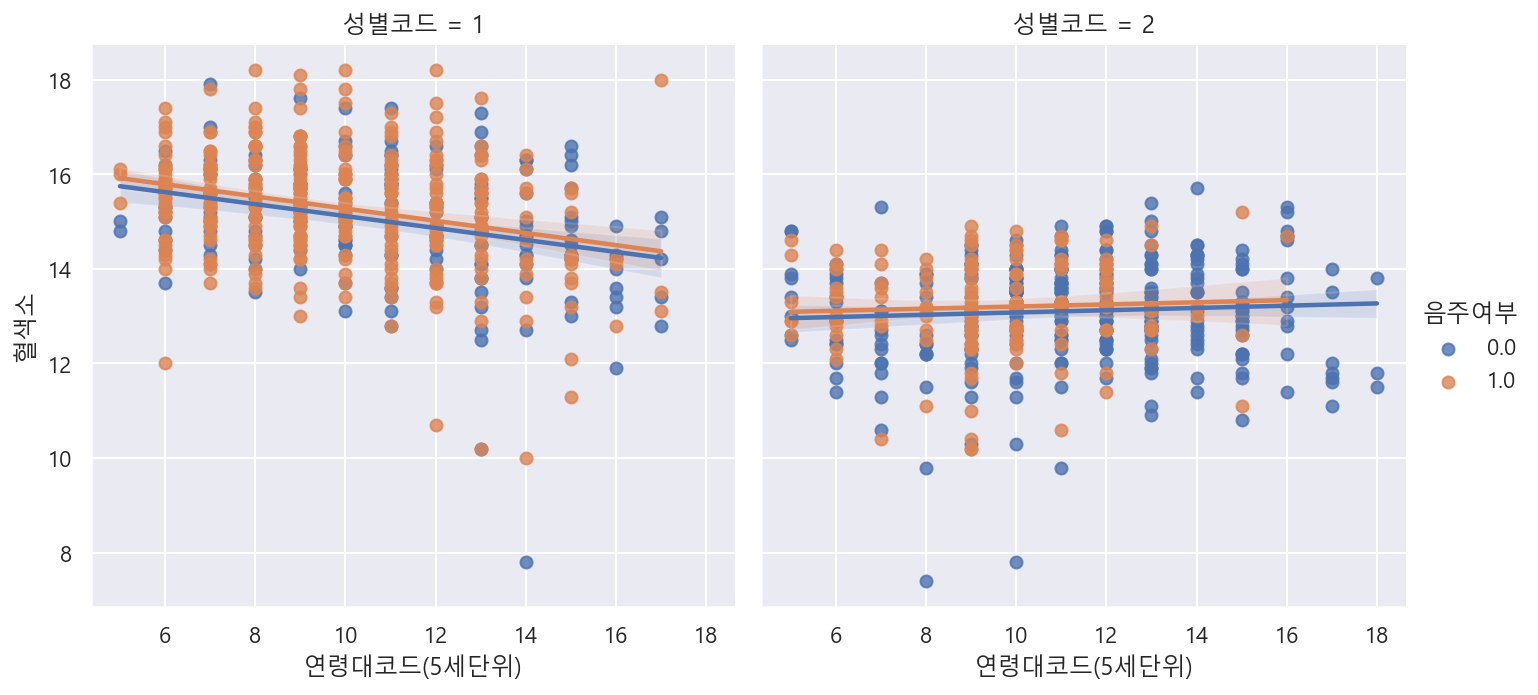

In [85]:
# lmplot으로 그리기

sns.lmplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", col = "성별코드")

# 수치형 데이터 시각화

## scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용합니다.
* 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

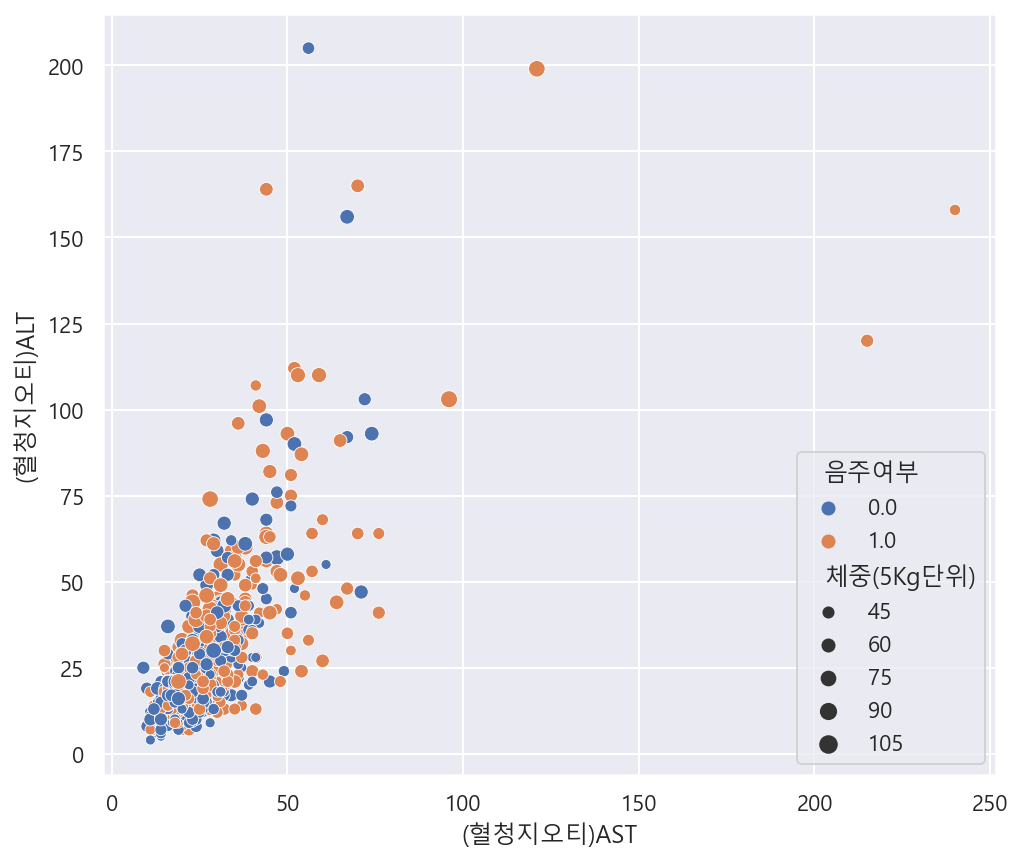

In [96]:
# scatterplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색사으로 표현되게 합니다. 

plt.figure(figsize = (8,7))
sns.scatterplot(data = df_sample, x = "(혈청지오티)AST", y= "(혈청지오티)ALT", hue = "음주여부", 
                size = "체중(5Kg단위)")

## lmplot - 상관 관계를 보기

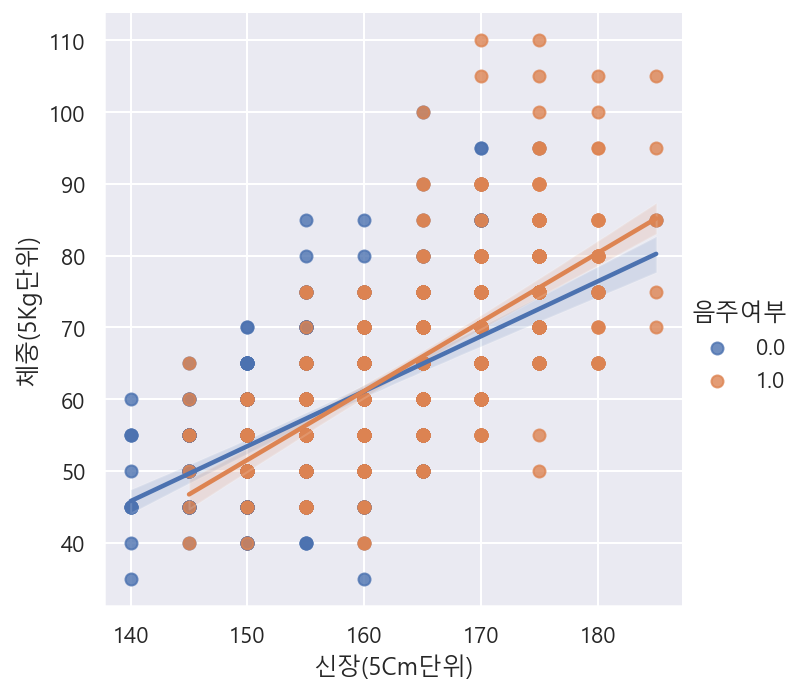

In [97]:
# lmplot으로 신장(5Cm단위)에 따른 체중(5kg단위)를 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다. 

sns.lmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "음주여부")

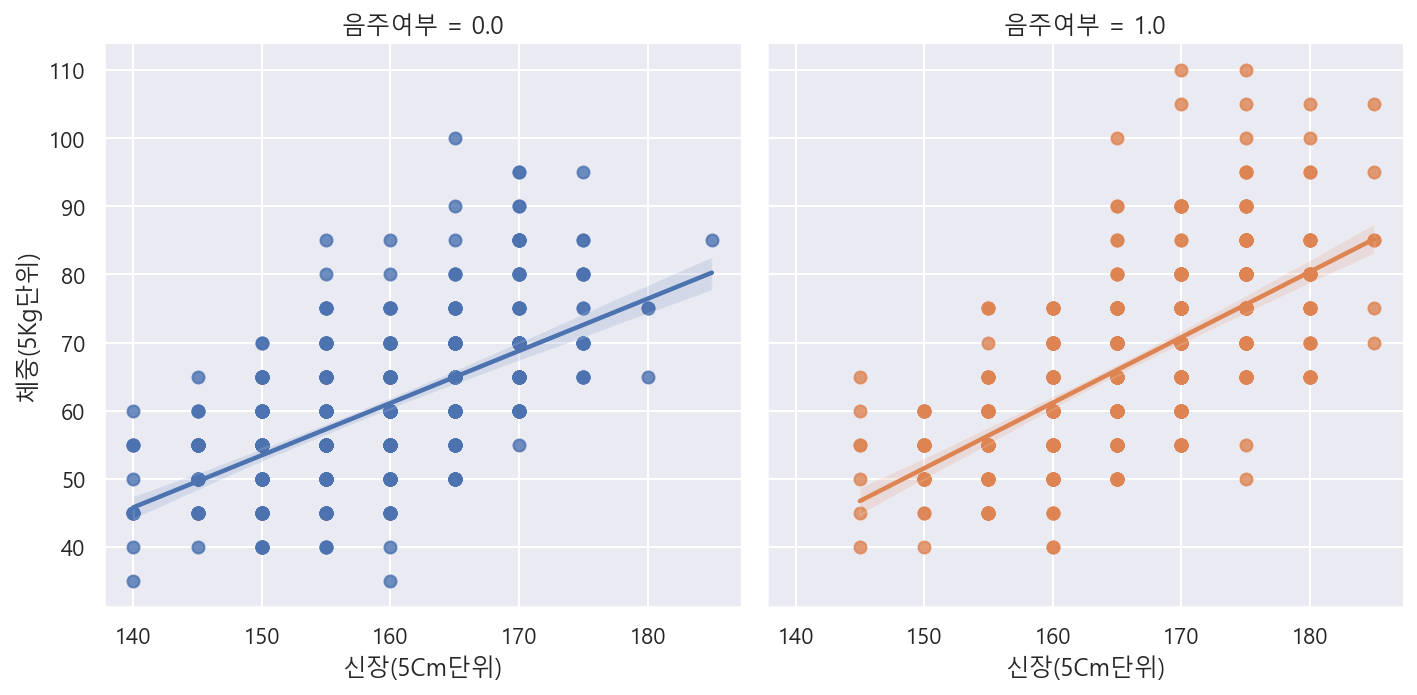

In [105]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 그려봅니다.
# 아래 그래프의 선 > 양의 상관관계
# 그의 반대는 음의 상관관계

sns.lmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg단위)", hue = "음주여부", col = "음주여부")

<Figure size 576x504 with 0 Axes>

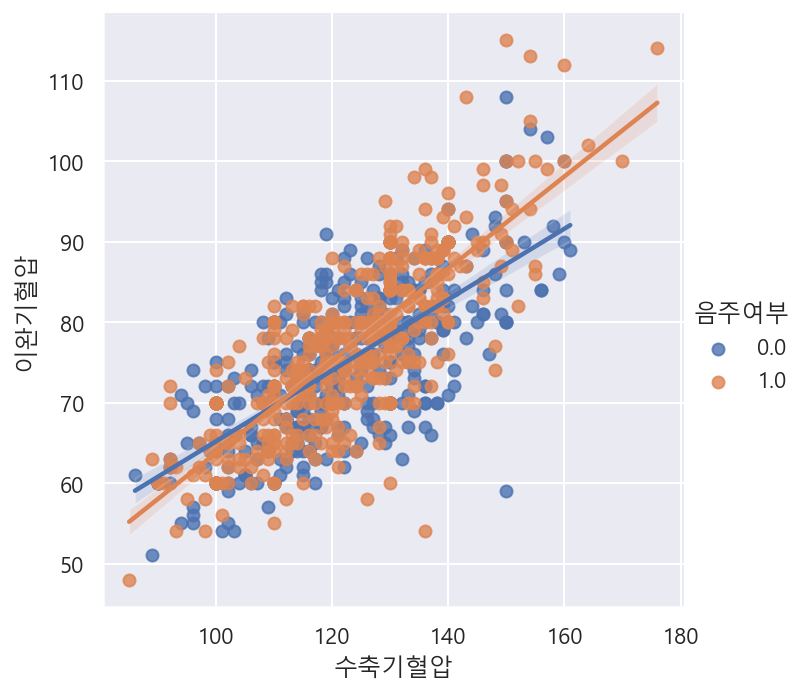

In [103]:
# lmplot으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다,

plt.figure(figsize = (8, 7))
sns.lmplot(data = df_sample, x = "수축기혈압", y = "이완기혈압", hue = "음주여부")


<!-- AST와 ALT는 간세포의 효소로, 간수치를 의미하며 간의 상태를 파악하는데 중요한 기준이 된다. -->
 

- AST와 ALT는 간세포의 효소로, 간수치를 의미한다. 간의 상태를 파악하는데 중요한 역할을 한다.

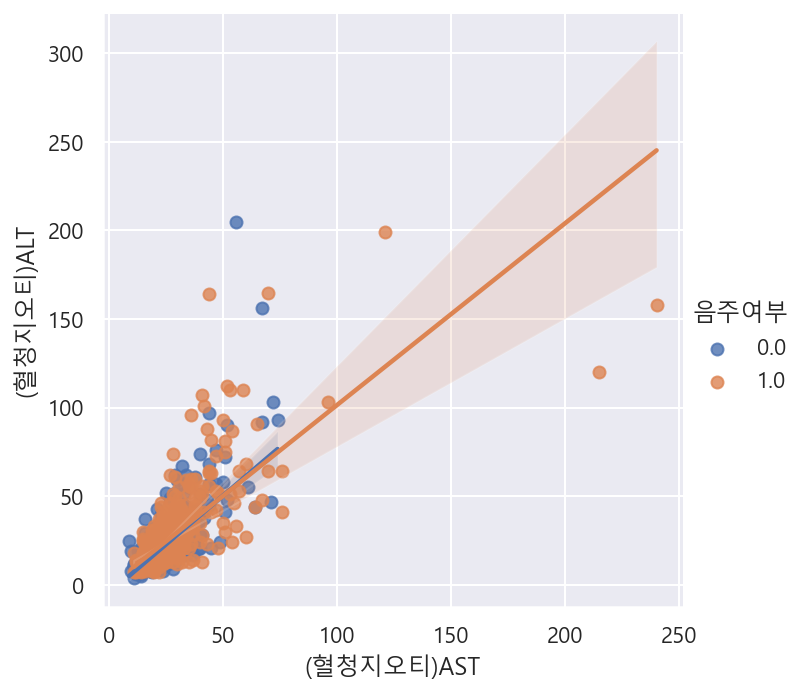

In [109]:
# lmplot으로 "(혈청지오티)AST", "(혈청지오티)ALT" 를 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.

sns.lmplot(data = df_sample, x ="(혈청지오티)AST", y ="(혈청지오티)ALT", hue= "음주여부", robust = True)

## 이상치 다루기
* 이상치가 있으면 데이터가ㅏ 자세히 보이지 않거나, 회귀선이 달라지기도 한다.
* 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 한다.

In [122]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이하인 값만 데이터프레임 형태로 추출해서
# df_ASLT라는 변수에 담습니다.

df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]
df_ASLT

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
276826  2017   276827     1           12    41        160         55   77.0   
849425  2017   849426     1            9    31        170         75   89.9   
504499  2017   504500     1            8    42        170         75   86.3   
601054  2017   601055     1           14    31        170         70   84.0   
980221  2017   980222     1           17    41        160         60   86.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
890013  2017   890014     2            8    41        155         80   98.0   
875389  2017   875390     1           11    41        170         60   81.0   
358458  2017   358459     1            9    11        170         90  101.0   
808228  2017   808229     1           11    28        160         65   85.0   
317698  2017   317699     1            9    41        165         85  100.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
276826    0.9    0.9  ...   38.0   3.0   1.0         0      NaN    NaN   
849425    1.0    1.0  ...   28.0   3.0   1.0         1      NaN    NaN   
504499    1.5    1.5  ...  121.0   3.0   1.0         1      NaN    NaN   
601054    0.8    0.9  ...   31.0   3.0   0.0         0      NaN    NaN   
980221    0.7    0.5  ...   28.0   1.0   0.0         0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
890013    0.2    0.2  ...   39.0   1.0   0.0         1      NaN    NaN   
875389    1.0    0.9  ...   59.0   3.0   1.0         0      NaN    NaN   
358458    1.2    1.2  ...   41.0   2.0   1.0         0      NaN    NaN   
808228    0.6    0.9  ...   37.0   2.0   0.0         0      NaN    NaN   
317698    1.2    1.0  ...   40.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  1.0  20181126  
504499      NaN           NaN  1.0  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
890013      NaN           NaN  1.0  20181126  
875389      NaN           NaN  NaN  20181126  
358458      NaN           NaN  NaN  20181126  
808228      NaN           NaN  NaN  20181126  
317698      NaN           NaN  NaN  20181126  

[999 rows x 34 columns]

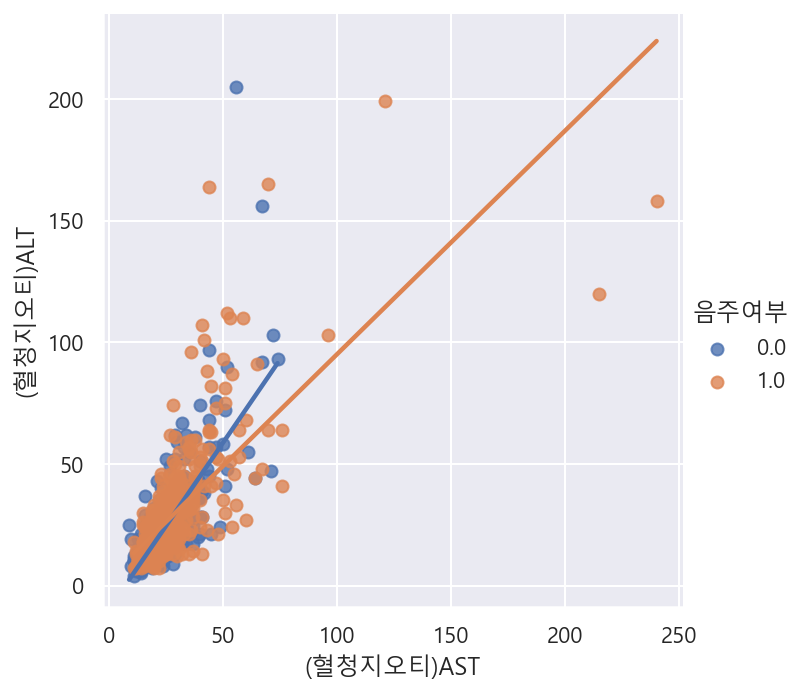

In [123]:
# 이상치를 제거한 "(혈청지오티)AST"와 "(혈청지오티)ALT"를 lmplot으로 그리며
# 음주여부에 따라 다른 색으로 표현합니다.

sns.lmplot(data = df_ASLT, x = "(혈청지오티)AST", y ="(혈청지오티)ALT", hue = "음주여부", ci = None)

In [129]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이상인 값만 데이터프레임 형태로 추출해서
# df_ASLT_high 라는 변수에 담습니다. 

df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) 
                  | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high 

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
4754    2017     4755     1            9    41        170         55   74.0   
15820   2017    15821     2           13    45        150         55   83.0   
17830   2017    17831     2            8    41        150         50   64.6   
19949   2017    19950     1            6    41        170        105  103.0   
26464   2017    26465     1            7    41        175         70   82.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
982305  2017   982306     2           16    28        155         50   79.3   
990867  2017   990868     2           11    41        145         45   75.0   
991226  2017   991227     1            6    42        170         80   81.0   
992747  2017   992748     2           10    41        165         40   58.0   
995323  2017   995324     1            7    11        185        105  101.4   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
4754      1.0    0.7  ...  125.0   3.0   1.0         0      NaN    NaN   
15820     0.6    1.2  ...  999.0   1.0   1.0         0      NaN    NaN   
17830     1.2    1.2  ...  111.0   3.0   1.0         1      NaN    NaN   
19949     1.0    1.2  ...  133.0   1.0   0.0         0      NaN    NaN   
26464     1.2    1.2  ...  169.0   1.0   0.0         1      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
982305    0.4    0.7  ...   71.0   1.0   0.0         0      NaN    NaN   
990867    0.9    1.2  ...  279.0   1.0   0.0         0      NaN    NaN   
991226    0.7    0.8  ...   49.0   3.0   1.0         0      NaN    NaN   
992747    0.9    0.7  ...  777.0   3.0   1.0         0      NaN    NaN   
995323    0.7    0.7  ...  174.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
4754        NaN           NaN  NaN  20181126  
15820       NaN           NaN  NaN  20181126  
17830       NaN           NaN  1.0  20181126  
19949       NaN           NaN  NaN  20181126  
26464       NaN           NaN  1.0  20181126  
...         ...           ...  ...       ...  
982305      NaN           NaN  NaN  20181126  
990867      NaN           NaN  NaN  20181126  
991226      NaN           NaN  NaN  20181126  
992747      NaN           NaN  NaN  20181126  
995323      NaN           NaN  NaN  20181126  

[381 rows x 34 columns]

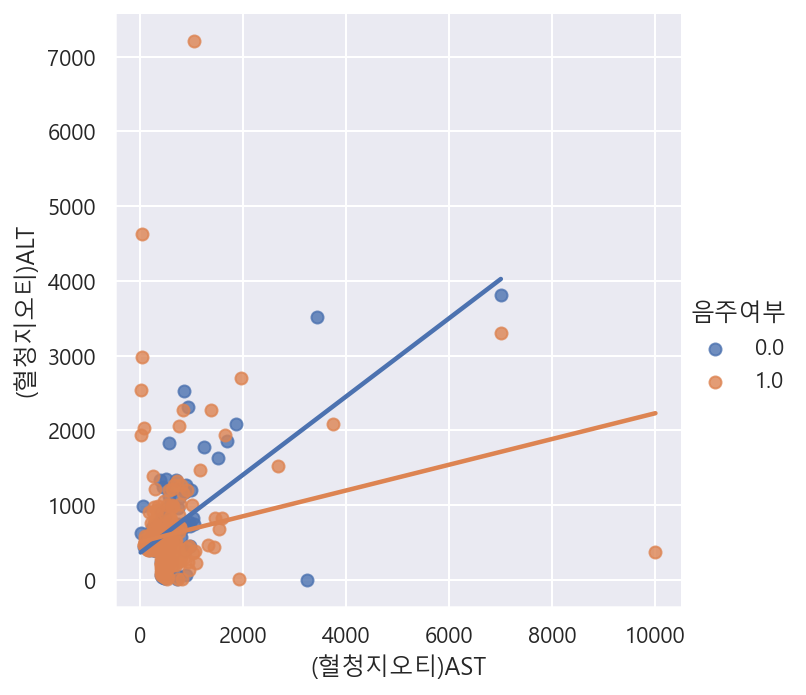

In [130]:
# 위에서 구한 df_ASLT_high 데이터 프레임에 담겨진 혈청지오티가 높은 데이터만 따로 봅니다. 

sns.lmplot(data = df_ASLT_high, x = "(혈청지오티)AST", y ="(혈청지오티)ALT", hue = "음주여부", ci = None)

In [137]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"]>8001]
df_ASLT_high_8000.iloc[:, 10:27]

청력(좌)  청력(우)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
541757    1.0    1.0   96.0   74.0        93.0   161.0      67.0      78.0   

        LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태  \
541757      69.0  15.4  1.0      1.2      9999.0       380.0  419.0   3.0   

        음주여부  
541757   1.0

## distplot
* distplot : 
    * displot : distribution plot의 통합 개념
* histplot : 히스토그램 - 데이터의 빈도 count(절대량)
* kdeplot : kernal density estimation - count(상대량)

In [143]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력합니다.

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [152]:
# distplot에서는 결측치가 있으면 data를 사용할 수 없음

df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.head()

0    193.0
1    228.0
2    136.0
3    201.0
4    199.0
Name: 총콜레스테롤, dtype: float64

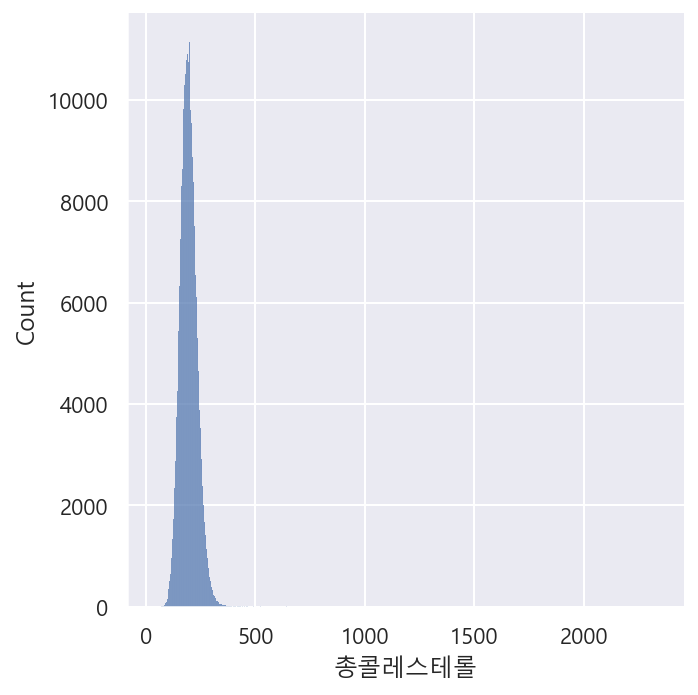

In [157]:
# "총콜레스테롤"에 따른 distplot 을 그립니다.
# future warning : displot or histplot 으로 바꿔서 사용, 새로 업뎃 됨
sns.displot(df_chol)

In [158]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

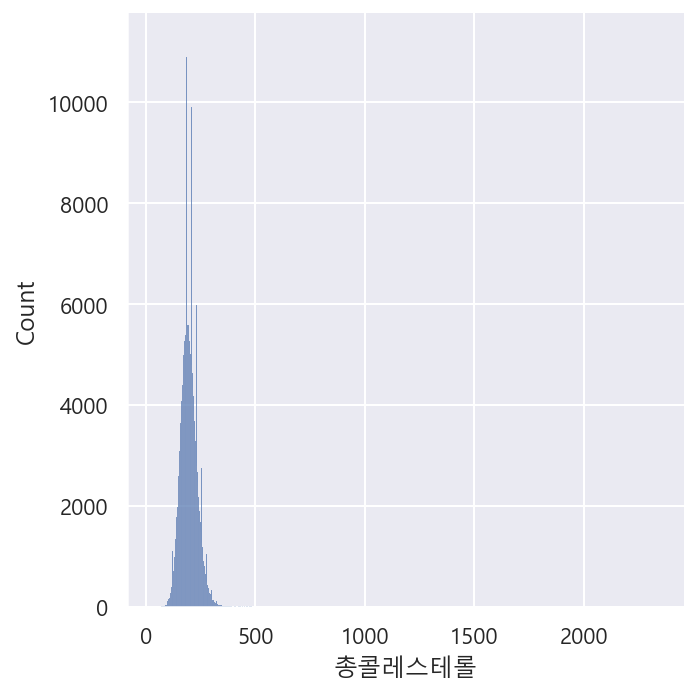

In [163]:
# 음주여부가 1인 값에 대한 "총콜레스테롤"을 distplot 으로 그립니다.
# displot 사용할 때는 series 형태("콜레스테롤")도 함께 명시를 해야한다. 그래야 내가 보고자하는 특정 정보만을 볼 수 있다

sns.displot(df.loc[df["총콜레스테롤"].notnull() 
                   & (df["음주여부"] ==1), "총콜레스테롤"])

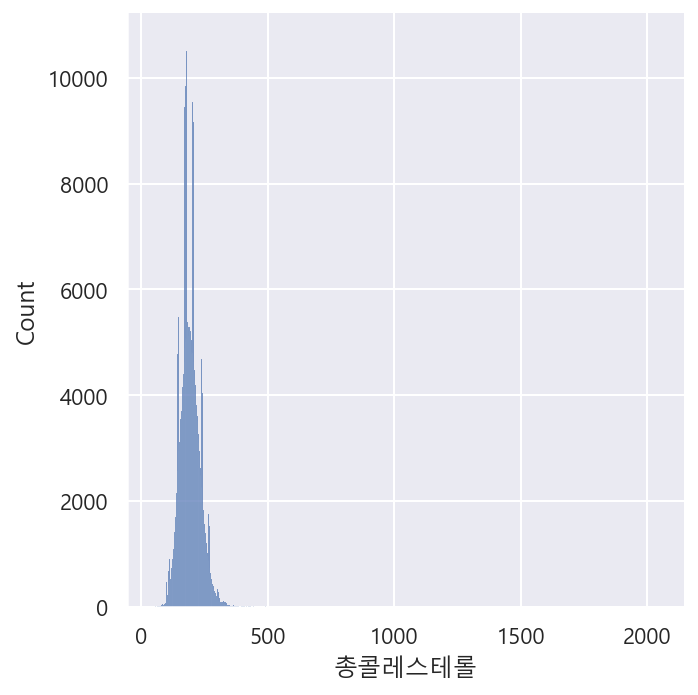

In [164]:
# 음주여부가 0인 값에 대한 "총콜레스테롤"을 distplot 으로 그립니다.

sns.displot(df.loc[df["총콜레스테롤"].notnull() 
                   & (df["음주여부"] ==0), "총콜레스테롤"])

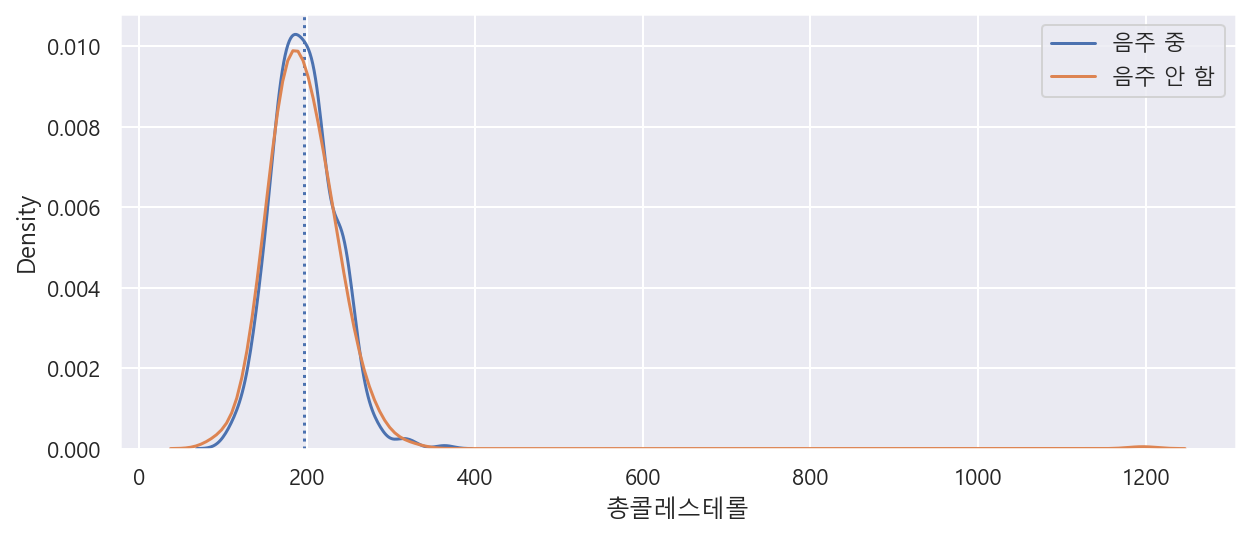

In [189]:
# 음주여부 값에 대한 "총콜레스테롤" 을 distplot 으로 그리며, 하나의 그래프에 표시되도록 한다.

plt.figure(figsize = (10, 4))
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle = ":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle = "")

sns.kdeplot(df_sample.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1), 
                   "총콜레스테롤"], label = "음주 중")
sns.kdeplot(df_sample.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0), 
                   "총콜레스테롤"], label = "음주 안 함")
plt.legend()

<AxesSubplot:xlabel='감마지티피', ylabel='Density'>

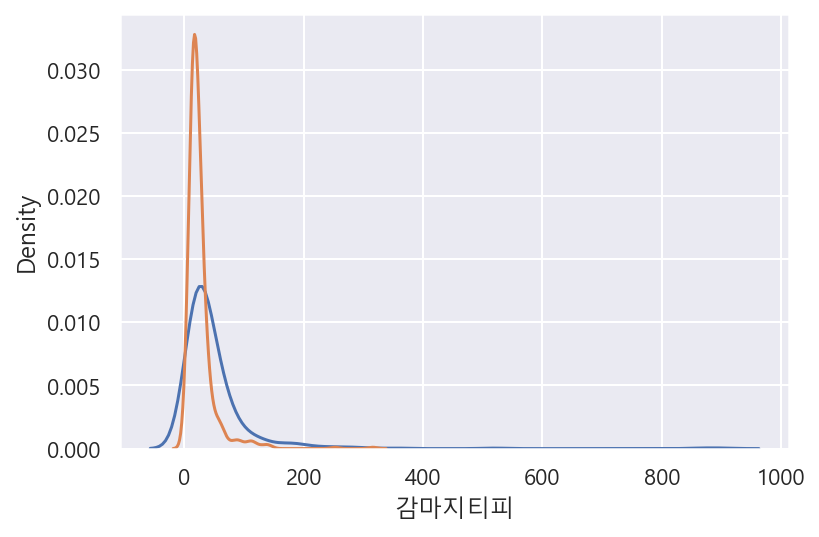

In [210]:
# 감마지티피 값에 따라 음주여부를 시각화 합니다.

s_1 = df_sample.loc[df_sample["음주여부"] == 1, "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] == 0, "감마지티피"]

sns.kdeplot(s_1, label = "음주 중" )
sns.kdeplot(s_0, label = "음주 안 함")

# 상관분석
* r이 -1.0과 -0.7 사이라면, 강한 음적 선형관계
* r이 -0.7과 -0.3 사이라면, 뚜렷한 음적 선형관계
* r이 -3.0과 -0.1 사이라면. 약한 음적 선형관계
* r이 -0.1과 +0.1 사이라면. 거의 무시될 수 있는 선형관계
* r이 +0.1과 +0.3 사이라면, 약한 양적 선형관계
* r이 +0.3과 +0.7 사이라면, 뚜렷한 양적 선형관계
* r이 +0.7과 +1.0 사이라면, 강한 양적 선형관계

In [217]:
# 상관계수에 사용할 컬럼을 변수에 담습니다.


columns = ['연령대코드(5세단위)','체중(5Kg단위)','신장(5Cm단위)',
           '허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)',
           '수축기혈압','이완기혈압','식전혈당(공복혈당)',
           '총콜레스테롤','트리글리세라이드','HDL콜레스테롤',
           'LDL콜레스테롤','혈색소','요단백','혈청크레아티닌',
           '(혈청지오티)ALT','(혈청지오티)AST','감마지티피',
           '흡연상태','음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)ALT',
 '(혈청지오티)AST',
 '감마지티피',
 '흡연상태',
 '음주여부']

## 상관계수 구하기

In [222]:
# 샘플컬럼만 가져와서 df_small 이라는 데이터프레임에 담은 뒤 상관계수를 구합니다.

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

연령대코드(5세단위)  체중(5Kg단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.200336  -0.380239  0.159797 -0.217613 -0.308829   
체중(5Kg단위)      -0.200336   1.000000   0.665067  0.785950  0.122194  0.168929   
신장(5Cm단위)      -0.380239   0.665067   1.000000  0.312230  0.202426  0.236260   
허리둘레            0.159797   0.785950   0.312230  1.000000  0.017355  0.030809   
시력(좌)          -0.217613   0.122194   0.202426  0.017355  1.000000  0.346265   
시력(우)          -0.308829   0.168929   0.236260  0.030809  0.346265  1.000000   
청력(좌)           0.233960  -0.043727  -0.064044  0.050644 -0.039499 -0.072118   
청력(우)           0.264549  -0.047717  -0.074738  0.073086 -0.081000 -0.102880   
수축기혈압           0.222408   0.288983   0.063929  0.349219 -0.012888 -0.036395   
이완기혈압           0.091006   0.324783   0.157810  0.329256  0.027854  0.001282   
식전혈당(공복혈당)      0.215097   0.164926   0.005997  0.235417 -0.041152 -0.043653   
총콜레스테롤         -0.008847   0.050713  -0.004133  0.036389 -0.052320  0.016831   
트리글리세라이드        0.037474   0.260689   0.135087  0.267643  0.032493  0.070753   
HDL콜레스테롤       -0.095972  -0.330577  -0.207537 -0.311478 -0.045579 -0.068572   
LDL콜레스테롤        0.008560   0.043839   0.008146  0.017287 -0.052768  0.003336   
혈색소            -0.178977   0.540191   0.541155  0.377673  0.142582  0.190303   
요단백             0.058702   0.012154  -0.007699  0.045948 -0.024741 -0.024977   
혈청크레아티닌         0.044958   0.170468   0.212811  0.131421  0.022175  0.080797   
(혈청지오티)ALT     -0.009871   0.401756   0.159199  0.407063  0.080793  0.123455   
(혈청지오티)AST      0.129357   0.193976   0.055783  0.253549  0.011212  0.003236   
감마지티피          -0.015357   0.246924   0.185091  0.234831  0.111903  0.035304   
흡연상태           -0.121132   0.392874   0.512294  0.246296  0.141441  0.089486   
음주여부           -0.275285   0.290207   0.410946  0.134891  0.081130  0.158678   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.233960  0.264549  0.222408  0.091006  ... -0.095972  0.008560   
체중(5Kg단위)   -0.043727 -0.047717  0.288983  0.324783  ... -0.330577  0.043839   
신장(5Cm단위)   -0.064044 -0.074738  0.063929  0.157810  ... -0.207537  0.008146   
허리둘레         0.050644  0.073086  0.349219  0.329256  ... -0.311478  0.017287   
시력(좌)       -0.039499 -0.081000 -0.012888  0.027854  ... -0.045579 -0.052768   
시력(우)       -0.072118 -0.102880 -0.036395  0.001282  ... -0.068572  0.003336   
청력(좌)        1.000000  0.565295  0.039115 -0.015526  ... -0.047898  0.006018   
청력(우)        0.565295  1.000000  0.056661 -0.005658  ... -0.069527 -0.032362   
수축기혈압        0.039115  0.056661  1.000000  0.751731  ... -0.093036 -0.007070   
이완기혈압       -0.015526 -0.005658  0.751731  1.000000  ... -0.091701  0.038887   
식전혈당(공복혈당)   0.012104  0.069277  0.218697  0.160601  ... -0.132477  0.043905   
총콜레스테롤       0.008247 -0.047907  0.039290  0.084102  ...  0.025190  0.861641   
트리글리세라이드     0.018695  0.034650  0.233447  0.225436  ... -0.312560  0.064503   
HDL콜레스테롤    -0.047898 -0.069527 -0.093036 -0.091701  ...  1.000000 -0.162307   
LDL콜레스테롤     0.006018 -0.032362 -0.007070  0.038887  ... -0.162307  1.000000   
혈색소         -0.000433 -0.050208  0.169241  0.255690  ... -0.252492  0.068631   
요단백          0.041231  0.081749  0.043110  0.035826  ... -0.058606  0.092367   
혈청크레아티닌      0.016792  0.017758  0.034018  0.081965  ... -0.141626 -0.013668   
(혈청지오티)ALT   0.044048 -0.019893  0.163762  0.191155  ... -0.169802  0.022981   
(혈청지오티)AST   0.020671 -0.004681  0.133472  0.131482  ... -0.060252 -0.011918   
감마지티피       -0.025004 -0.024936  0.191333  0.200150  ... -0.067822  0.007599   
흡연상태         0.007413 -0.042159  0.094145  0.144974  ... -0.213555  0.025842   
음주여부        -0.053293 -0.072404  0.042372  0.108679  ... -0.016938 -0.023031   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)ALT  (혈청지오티)AST     감마지티피  \
연령대코드(5세단위) -0.178977  0.058702  0.044958   -0.009871    0.129357 -0.015357   
체중(5Kg단위)    

In [235]:
# 키에 대한 상관계수가 특정 수치 이상의 데이터를 봅니다.

df_corr.loc[df_corr["신장(5Cm단위)"] > 0.1, "신장(5Cm단위)"]

체중(5Kg단위)     0.665067
신장(5Cm단위)     1.000000
허리둘레          0.312230
시력(좌)         0.202426
시력(우)         0.236260
이완기혈압         0.157810
트리글리세라이드      0.135087
혈색소           0.541155
혈청크레아티닌       0.212811
(혈청지오티)ALT    0.159199
감마지티피         0.185091
흡연상태          0.512294
음주여부          0.410946
Name: 신장(5Cm단위), dtype: float64

In [240]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
# df_corr["음주여부"].sort_values() 미리 확인해서 특정 수치 가늠


df_corr.loc[df_corr["음주여부"].sort_values() > 0.25, "음주여부"]

체중(5Kg단위)    0.290207
신장(5Cm단위)    0.410946
혈색소          0.312005
흡연상태         0.344286
음주여부         1.000000
Name: 음주여부, dtype: float64

In [242]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

df_corr["혈색소"].sort_values(ascending = False).head(7)

# df_corr.loc[df_corr["혈색소"].sort_values() > 0.3, "혈색소"]

혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
음주여부          0.312005
Name: 혈색소, dtype: float64

In [243]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

df_corr["감마지티피"].sort_values(ascending = False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

## heatmap

<AxesSubplot:>

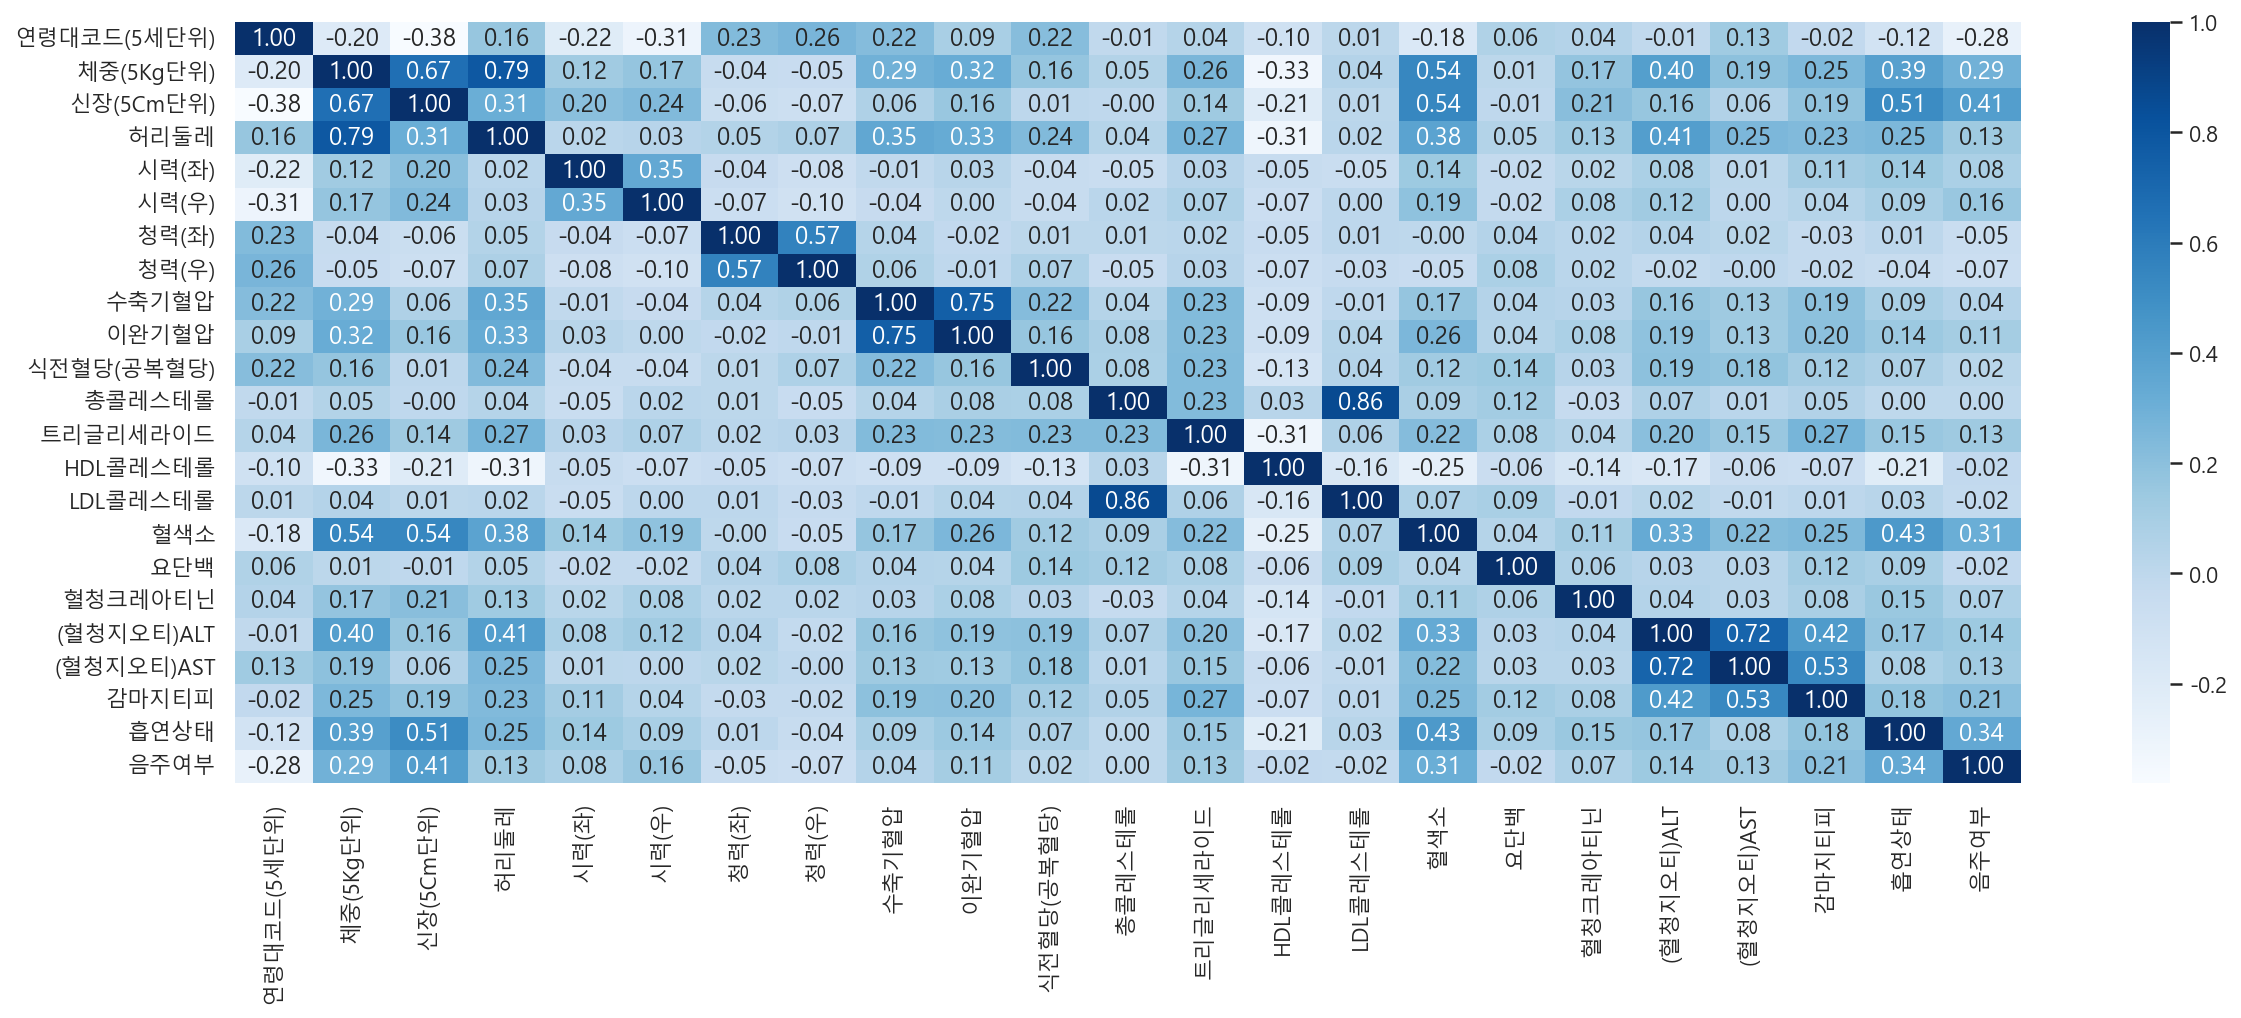

In [248]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.

plt.figure(figsize = (20,7))
sns.heatmap(df_corr, annot = True, fmt = ".2f", cmap = "Blues")

C:\Users\YOON\AppData\Local\Temp\ipykernel_21520\2345330882.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype = np.bool))


<AxesSubplot:>

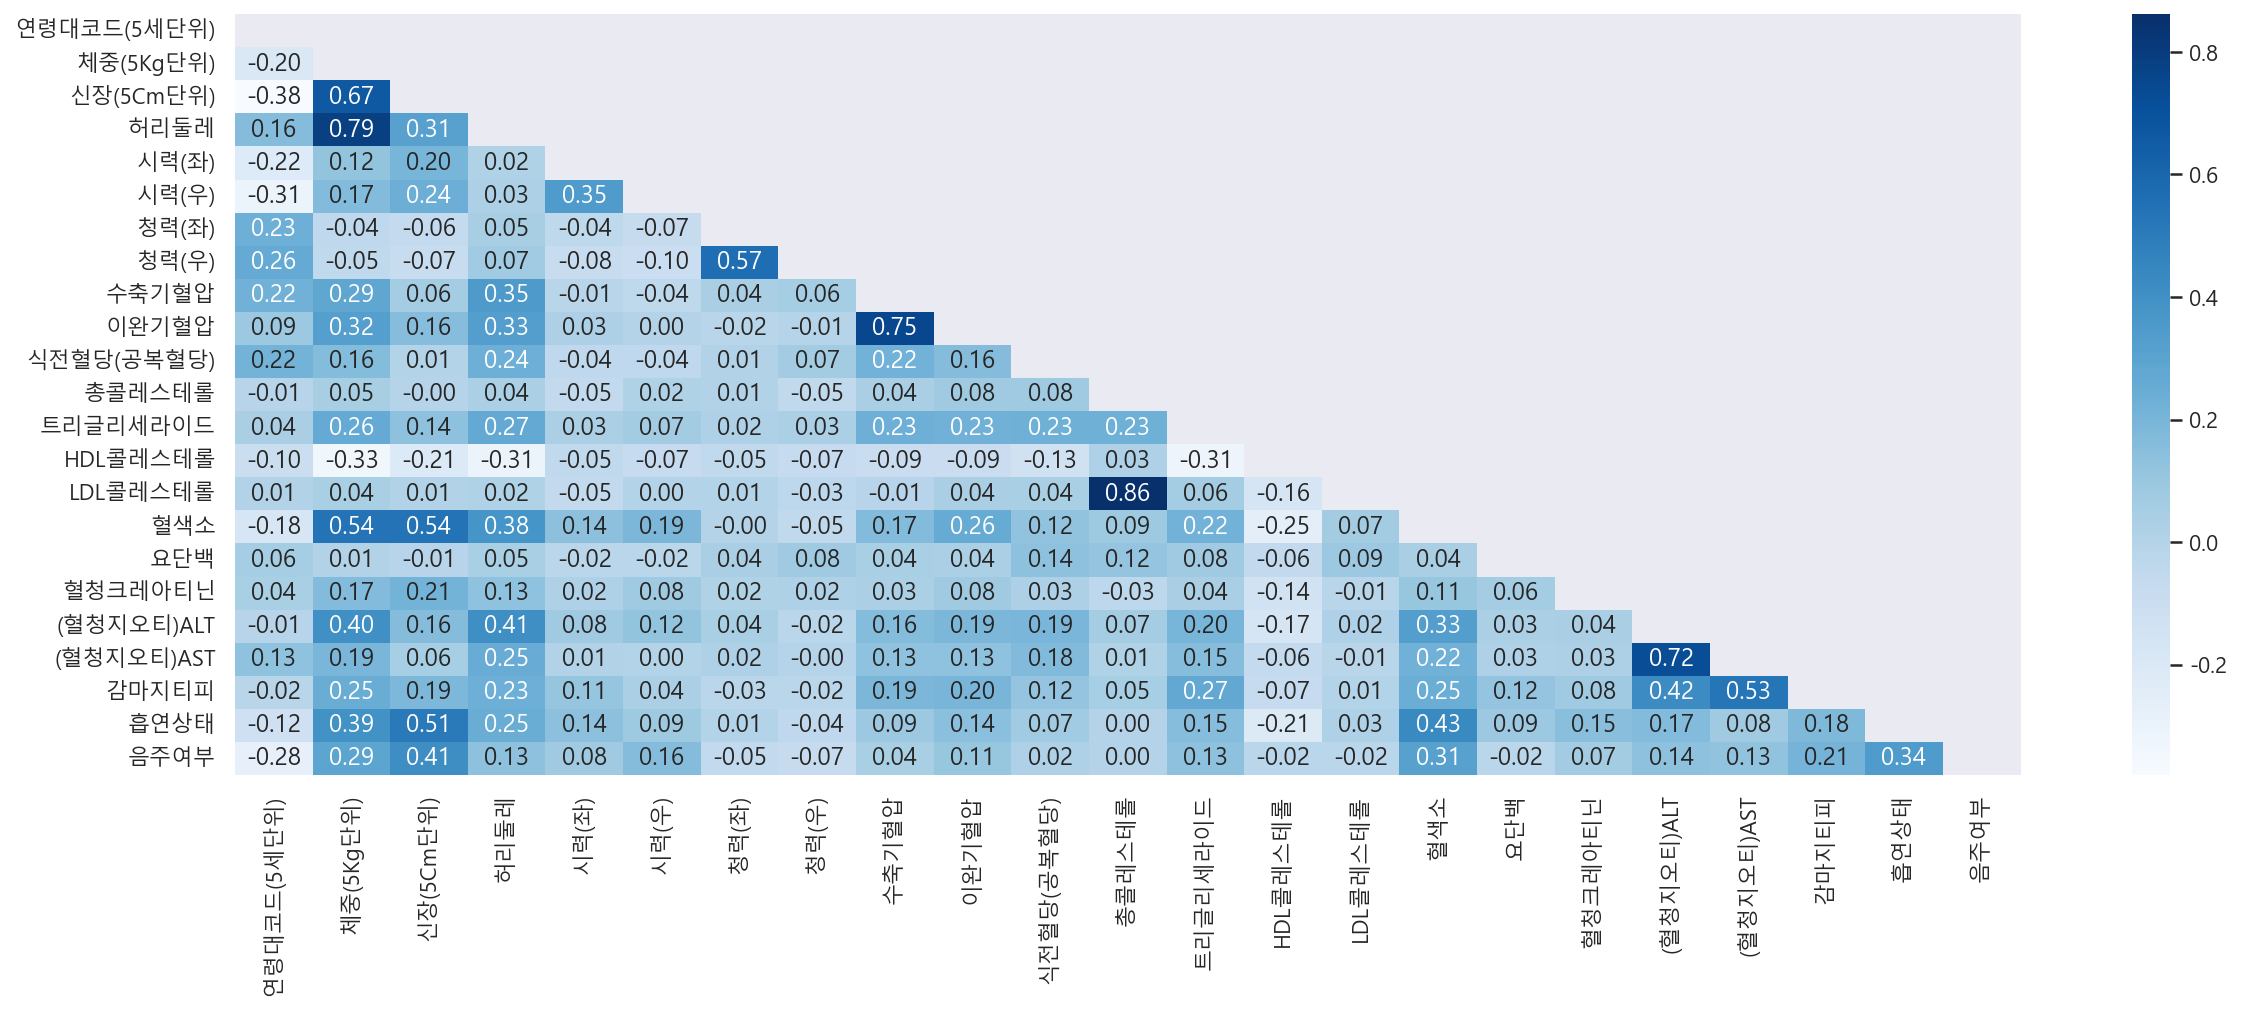

In [251]:
mask = np.triu(np.ones_like(df_corr, dtype = np.bool))

plt.figure(figsize = (20,7))
sns.heatmap(df_corr, annot = True, fmt = ".2f", cmap = "Blues", mask = mask)